# Generate & Replace tomorrow SoC graph

그림과 함께 보이는게 좋을 것 같아 부득이하게 ipynb로 만듭니다.

In [1]:
import os
import glob
import math
import random
import json
import argparse
import numpy as np
from tqdm import tqdm
from datetime import datetime

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

from model import lstm_generator

/home/jan4021/anaconda3/envs/ess/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Visualize today, tomorrow, predicted(model's output)

./data/train_result_filtered/lr1e-4_lambda1_0.1_whole_data
today(intensity=0), tomorrow(intensity=0)
MSE Loss = 0.0009559722966514528
delta_pred mean = -0.02198149636387825
tomorrow-today mean = 0.006074889563024044


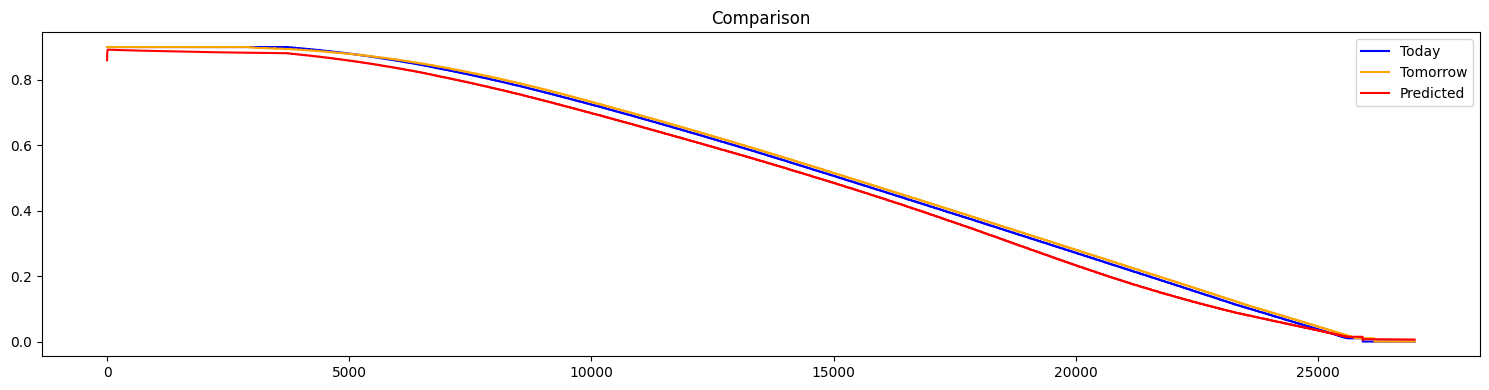

today(intensity=0.1), tomorrow(intensity=0.2)
MSE Loss = 0.0001831894915085286
delta_pred mean = -0.022858712822198868
tomorrow-today mean = -0.014056509360671043


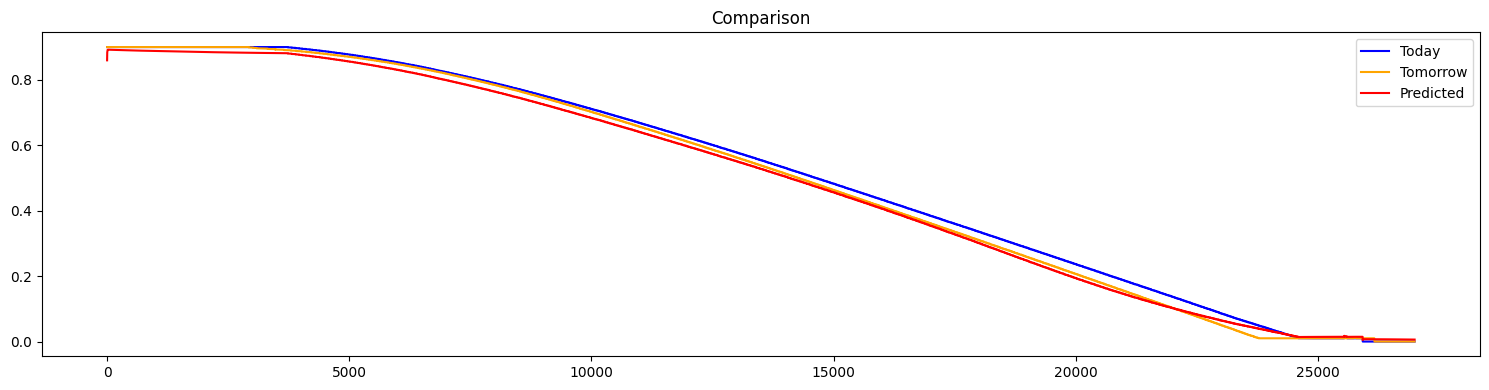

today(intensity=0.2), tomorrow(intensity=0.3)
MSE Loss = 0.0001593527995282784
delta_pred mean = -0.023772986605763435
tomorrow-today mean = -0.015302927233278751


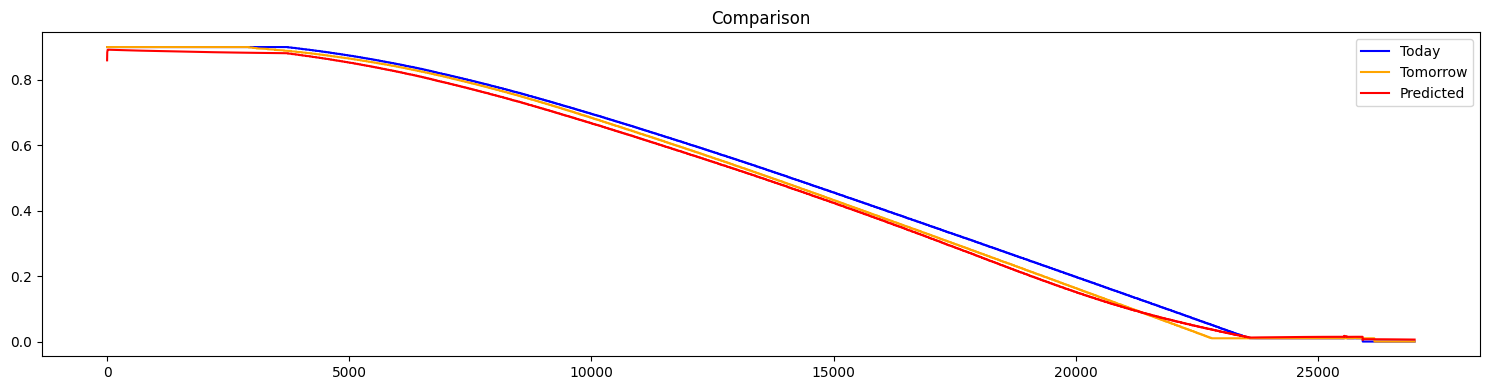

today(intensity=0.3), tomorrow(intensity=0.4)
MSE Loss = 0.00013670933549292386
delta_pred mean = -0.024686366319656372
tomorrow-today mean = -0.016759783029556274


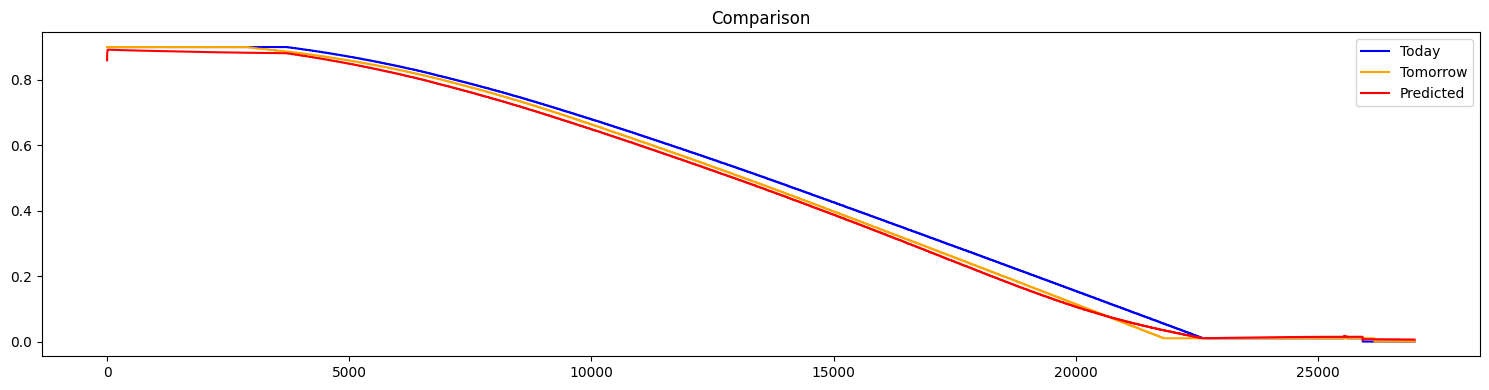

today(intensity=0.4), tomorrow(intensity=0.5)
MSE Loss = 0.00011319926124997437
delta_pred mean = -0.025487620383501053
tomorrow-today mean = -0.018289899453520775


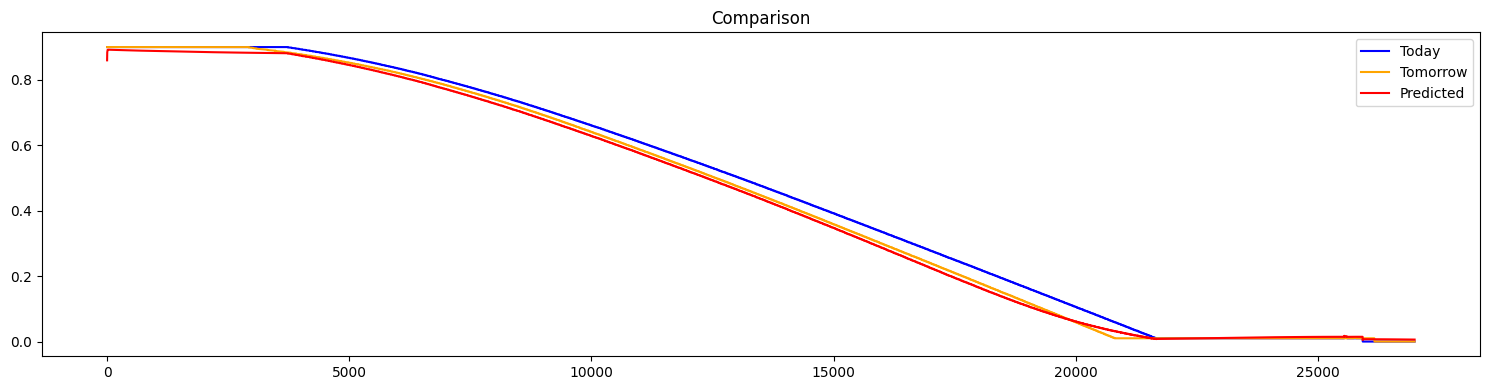

today(intensity=0.5), tomorrow(intensity=0.6)
MSE Loss = 8.869559678714722e-05
delta_pred mean = -0.026050468906760216
tomorrow-today mean = -0.0199397262185812


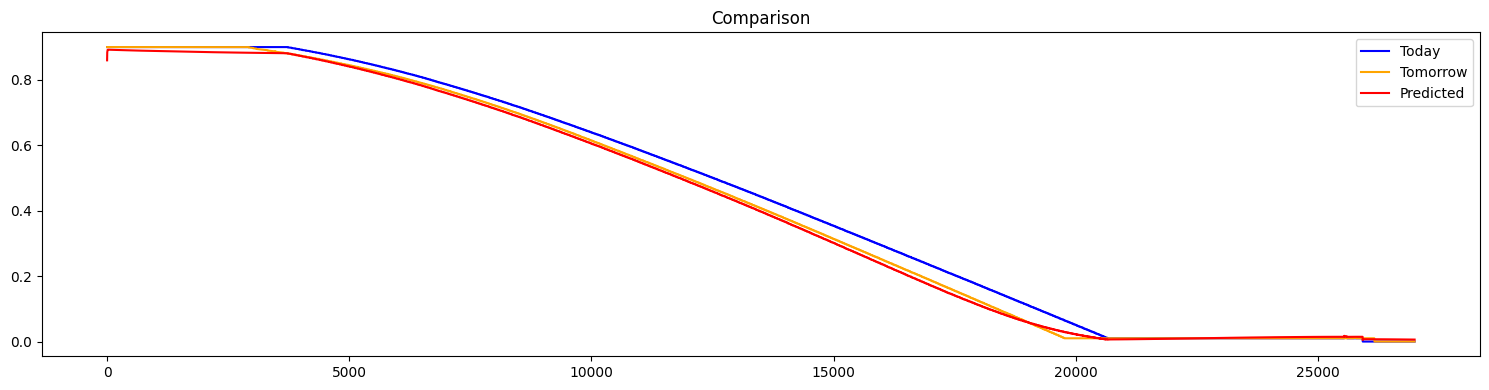

today(intensity=0.6), tomorrow(intensity=0.7)
MSE Loss = 6.46537373540923e-05
delta_pred mean = -0.026212256401777267
tomorrow-today mean = -0.021678047254681587


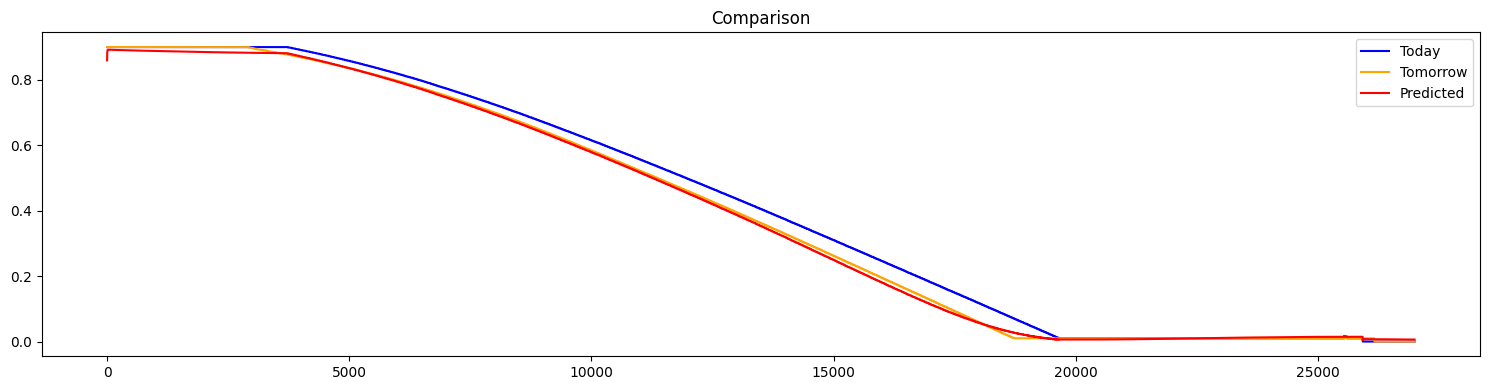

today(intensity=0.7), tomorrow(intensity=0.8)
MSE Loss = 4.596696817316115e-05
delta_pred mean = -0.02582514099776745
tomorrow-today mean = -0.02354356087744236


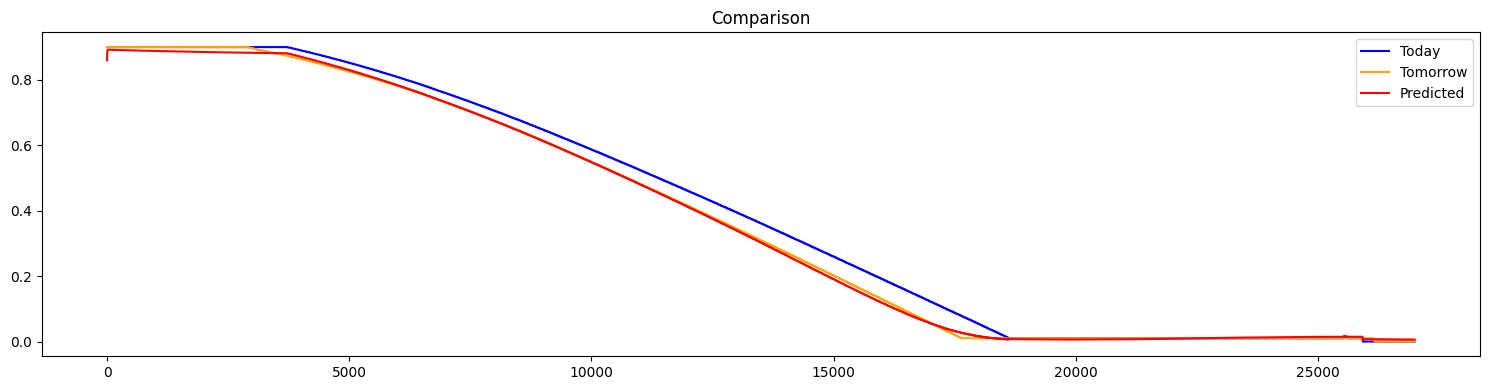

today(intensity=0.8), tomorrow(intensity=0.9)
MSE Loss = 4.894144876743667e-05
delta_pred mean = -0.024856073781847954
tomorrow-today mean = -0.02549746073782444


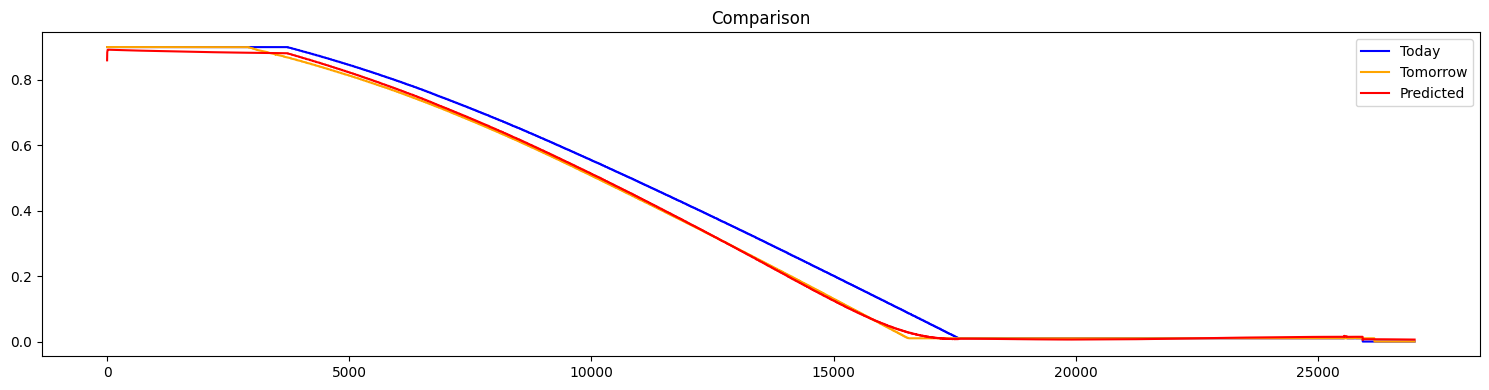

today(intensity=0.9), tomorrow(intensity=1.0)
MSE Loss = 0.00010410245158709586
delta_pred mean = -0.023463129997253418
tomorrow-today mean = -0.027583342045545578


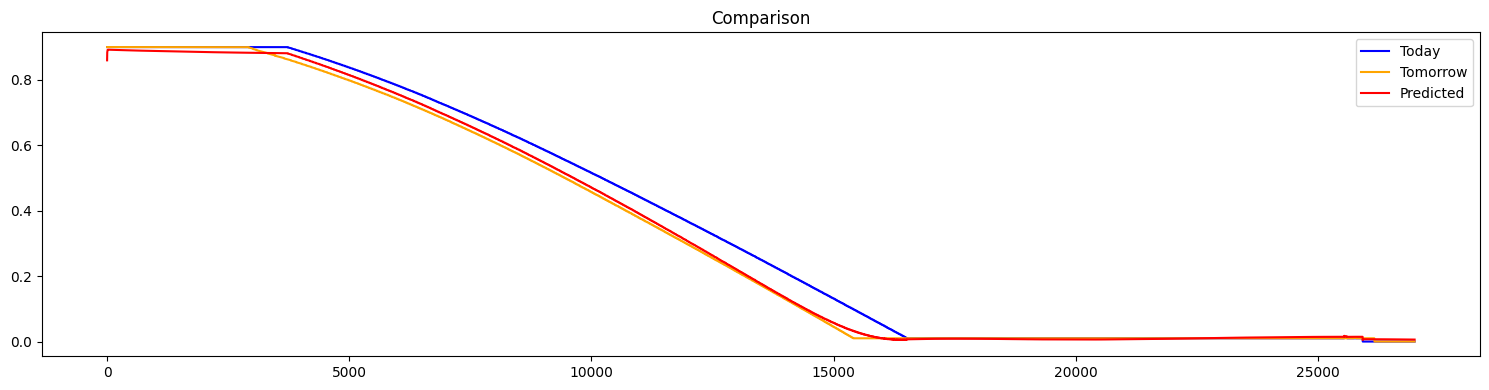

./data/train_result_filtered/lr1e-4_lambda1_0.1_55000_82000_0908
today(intensity=0), tomorrow(intensity=0)
MSE Loss = 0.0011599939316511154
delta_pred mean = -0.024319827556610107
tomorrow-today mean = 0.006074889563024044


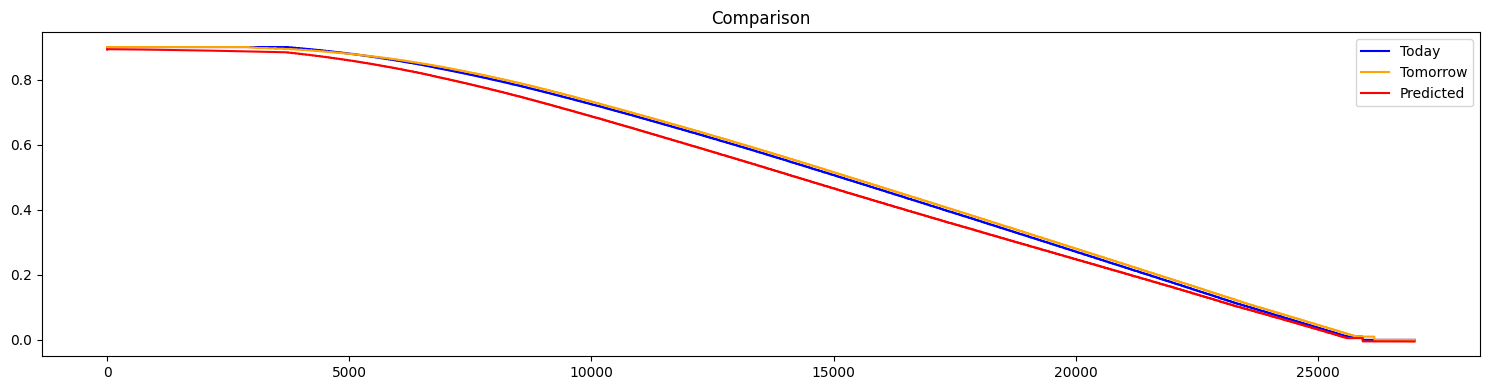

today(intensity=0.1), tomorrow(intensity=0.2)
MSE Loss = 0.000354099553078413
delta_pred mean = -0.024374784901738167
tomorrow-today mean = -0.014056509360671043


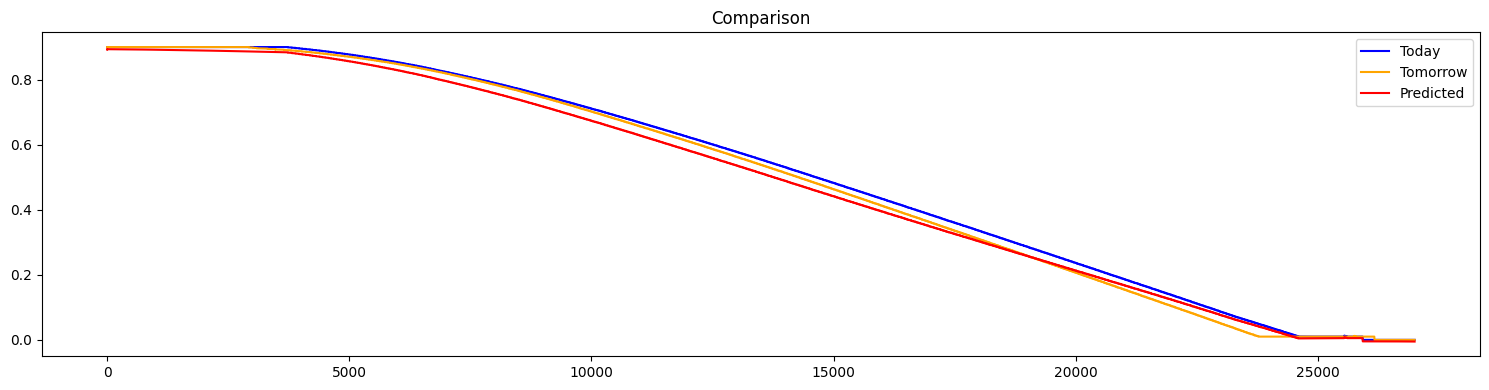

today(intensity=0.2), tomorrow(intensity=0.3)
MSE Loss = 0.0002794469182845205
delta_pred mean = -0.024437585845589638
tomorrow-today mean = -0.015302927233278751


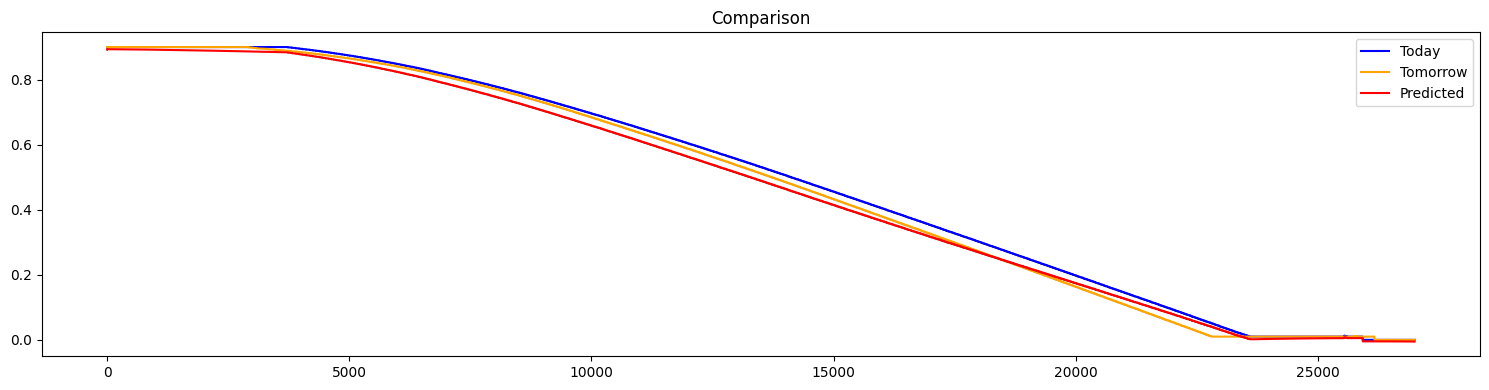

today(intensity=0.3), tomorrow(intensity=0.4)
MSE Loss = 0.00021321697568055242
delta_pred mean = -0.024508453905582428
tomorrow-today mean = -0.016759783029556274


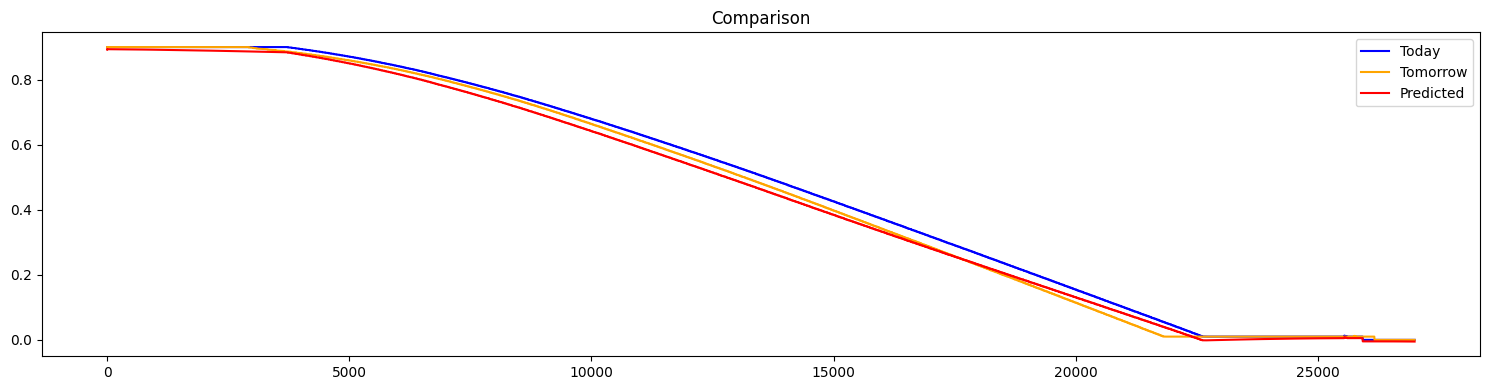

today(intensity=0.4), tomorrow(intensity=0.5)
MSE Loss = 0.00015905934560578316
delta_pred mean = -0.024587510153651237
tomorrow-today mean = -0.018289899453520775


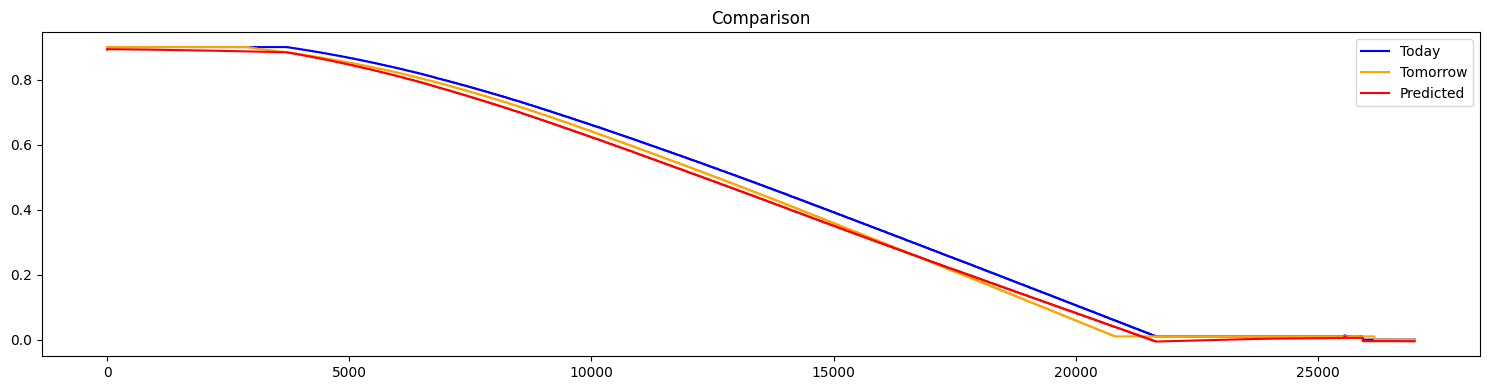

today(intensity=0.5), tomorrow(intensity=0.6)
MSE Loss = 0.00012656196486204863
delta_pred mean = -0.024674471467733383
tomorrow-today mean = -0.0199397262185812


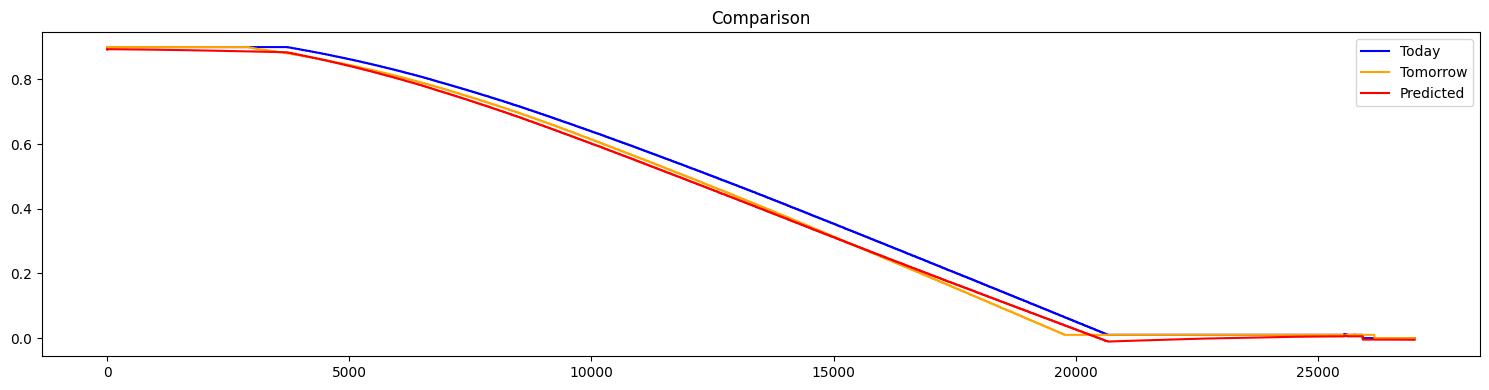

today(intensity=0.6), tomorrow(intensity=0.7)
MSE Loss = 0.00012701154628302902
delta_pred mean = -0.024768780916929245
tomorrow-today mean = -0.021678047254681587


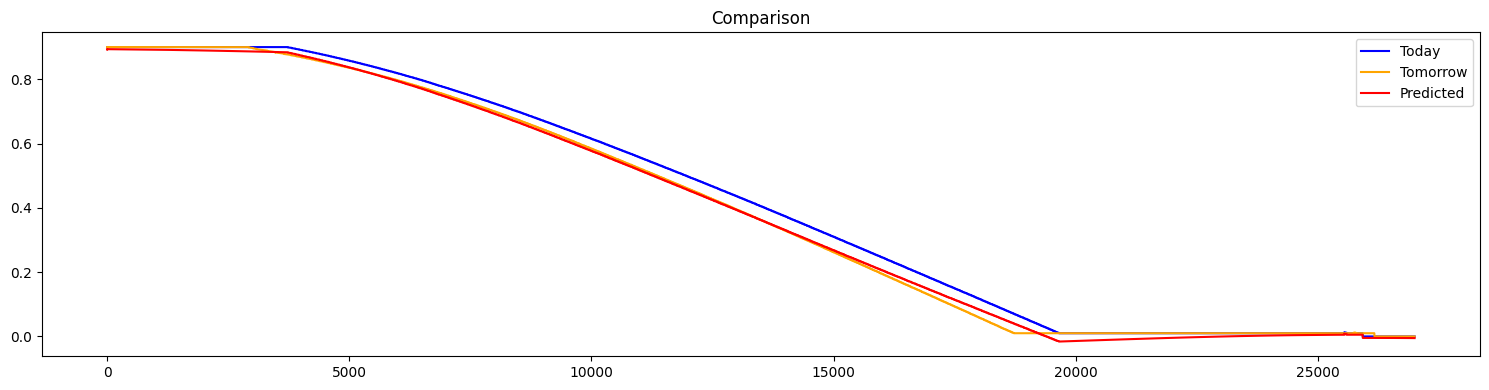

today(intensity=0.7), tomorrow(intensity=0.8)
MSE Loss = 0.00017556386592332274
delta_pred mean = -0.024869637563824654
tomorrow-today mean = -0.02354356087744236


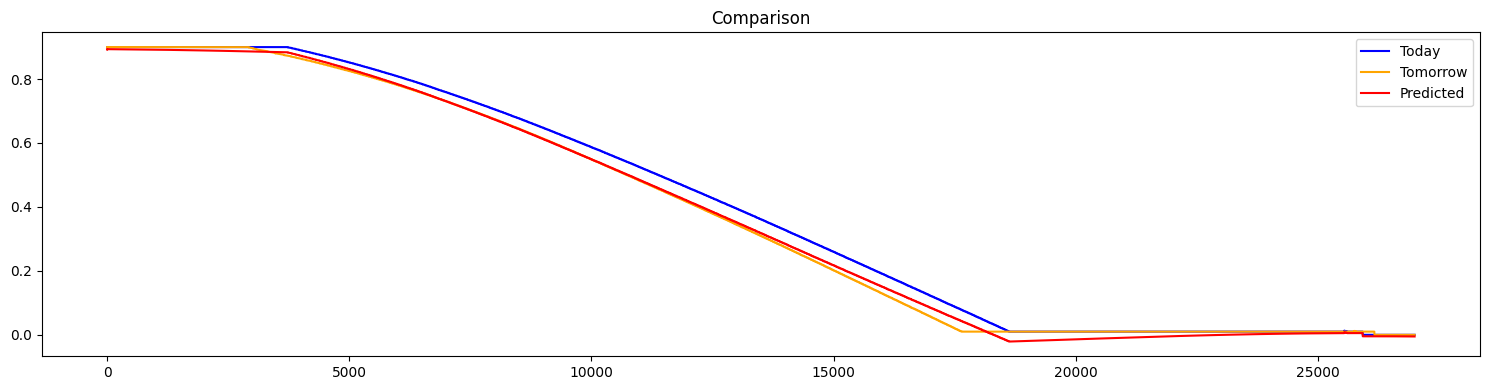

today(intensity=0.8), tomorrow(intensity=0.9)
MSE Loss = 0.00029051798628643155
delta_pred mean = -0.024975530803203583
tomorrow-today mean = -0.02549746073782444


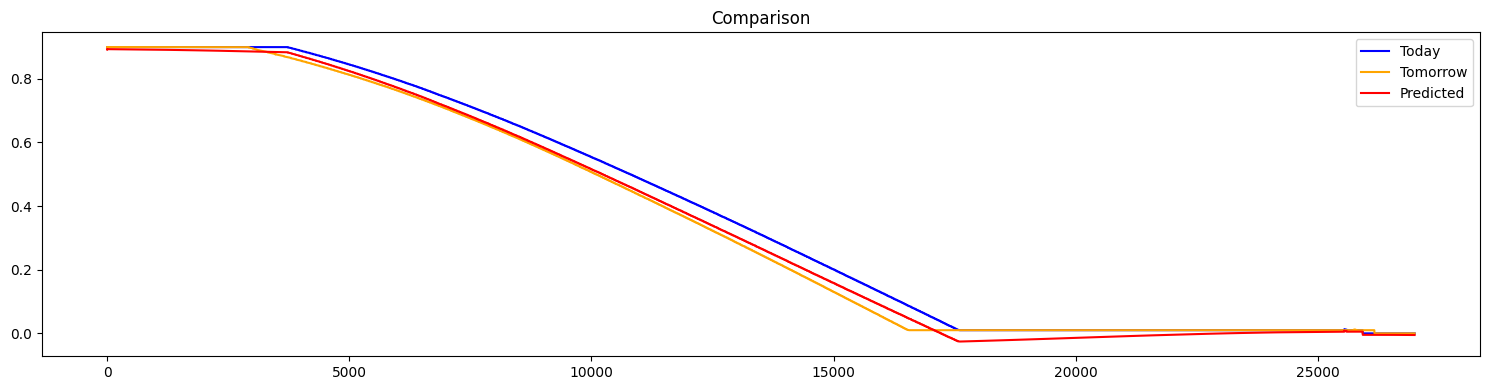

today(intensity=0.9), tomorrow(intensity=1.0)
MSE Loss = 0.0004965271218679845
delta_pred mean = -0.025084778666496277
tomorrow-today mean = -0.027583342045545578


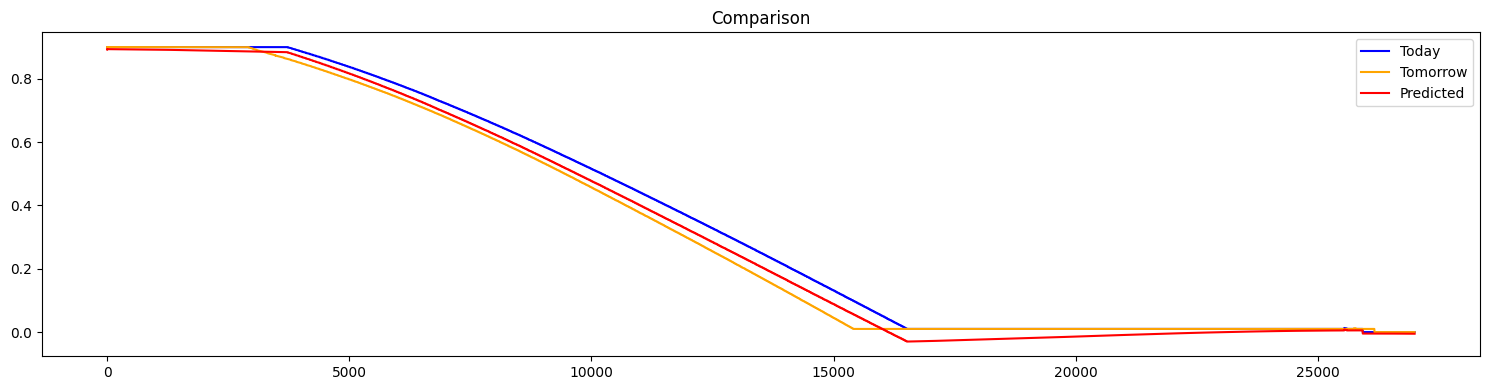

./data/train_result_filtered/lr1e-4_lambda1_0.05_55000_82000_0908_syn3_mse
today(intensity=0), tomorrow(intensity=0)
MSE Loss = 0.0005387651035562158
delta_pred mean = -0.015234014950692654
tomorrow-today mean = 0.006074889563024044


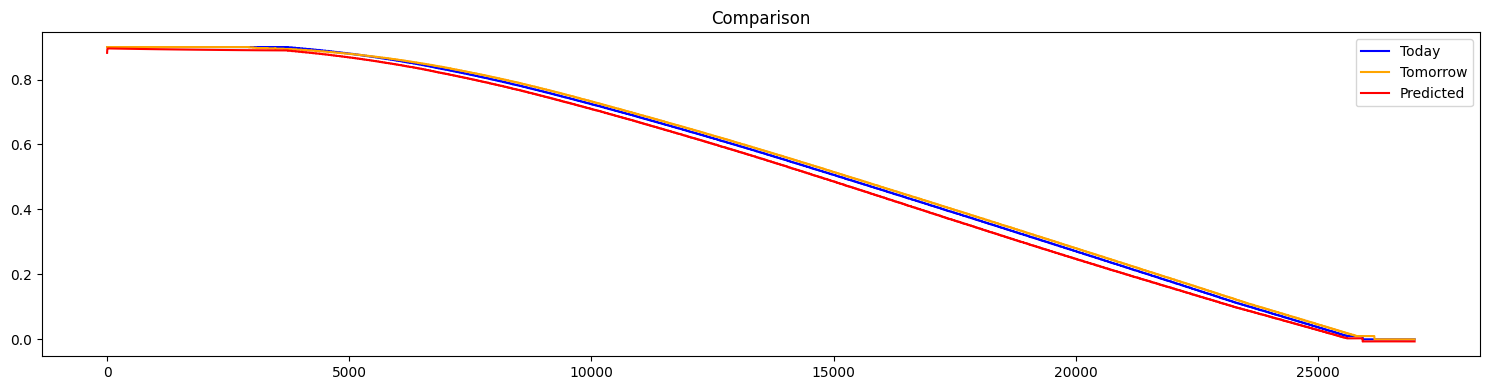

today(intensity=0.1), tomorrow(intensity=0.2)
MSE Loss = 7.869309047237039e-05
delta_pred mean = -0.016537725925445557
tomorrow-today mean = -0.014056509360671043


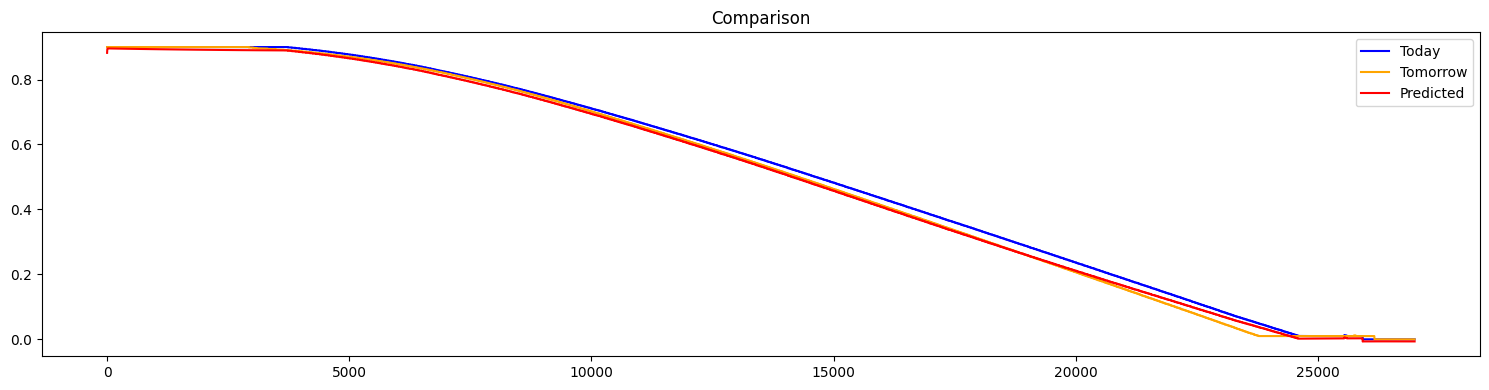

today(intensity=0.2), tomorrow(intensity=0.3)
MSE Loss = 7.10170716047287e-05
delta_pred mean = -0.017912615090608597
tomorrow-today mean = -0.015302927233278751


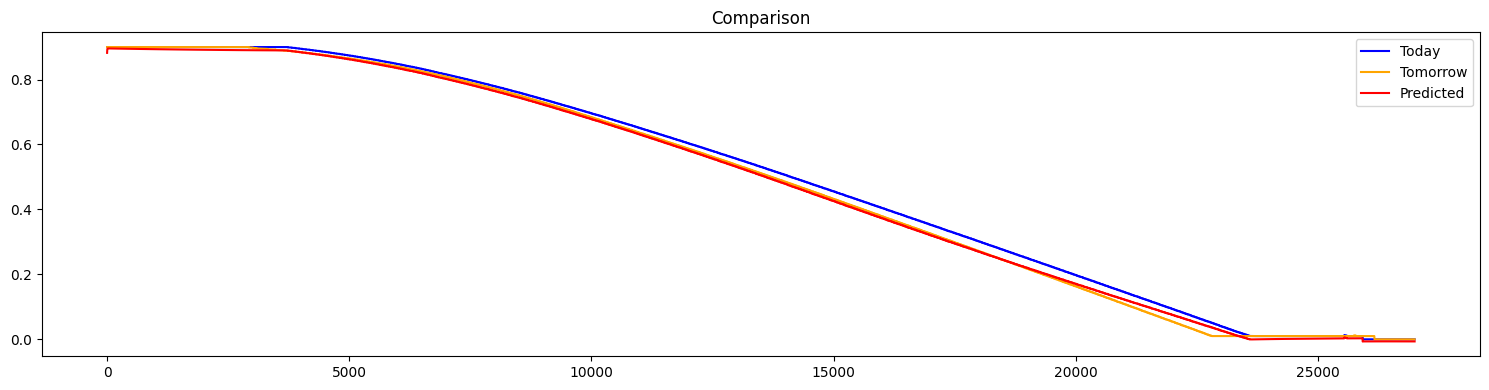

today(intensity=0.3), tomorrow(intensity=0.4)
MSE Loss = 6.725623097736388e-05
delta_pred mean = -0.019335320219397545
tomorrow-today mean = -0.016759783029556274


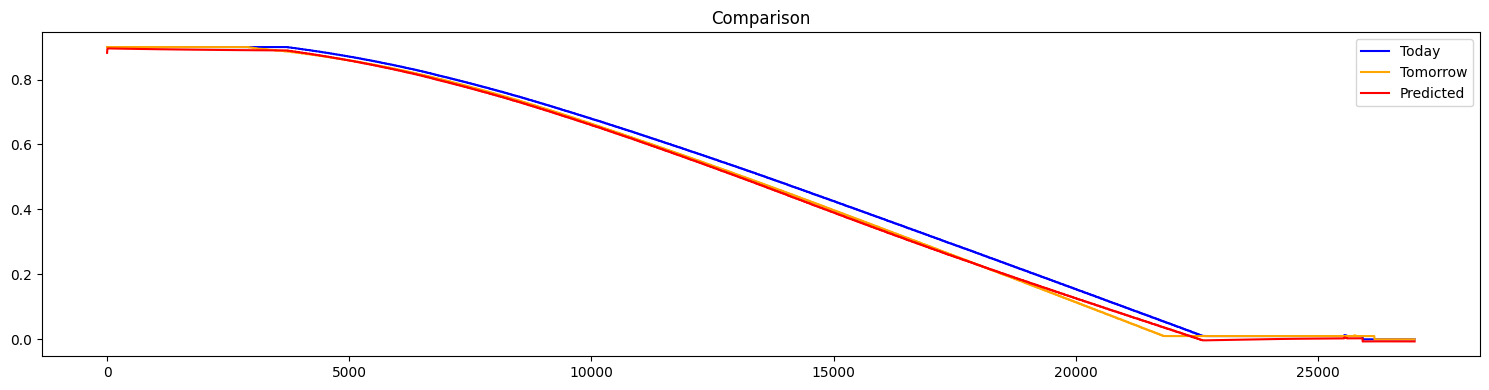

today(intensity=0.4), tomorrow(intensity=0.5)
MSE Loss = 6.780697731301188e-05
delta_pred mean = -0.020757263526320457
tomorrow-today mean = -0.018289899453520775


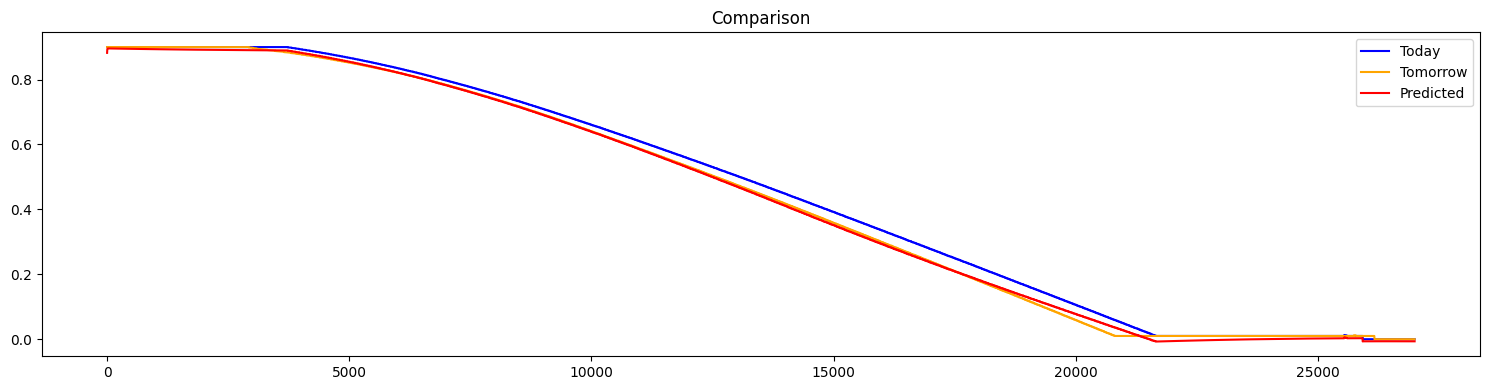

today(intensity=0.5), tomorrow(intensity=0.6)
MSE Loss = 7.891148561611772e-05
delta_pred mean = -0.022100387141108513
tomorrow-today mean = -0.0199397262185812


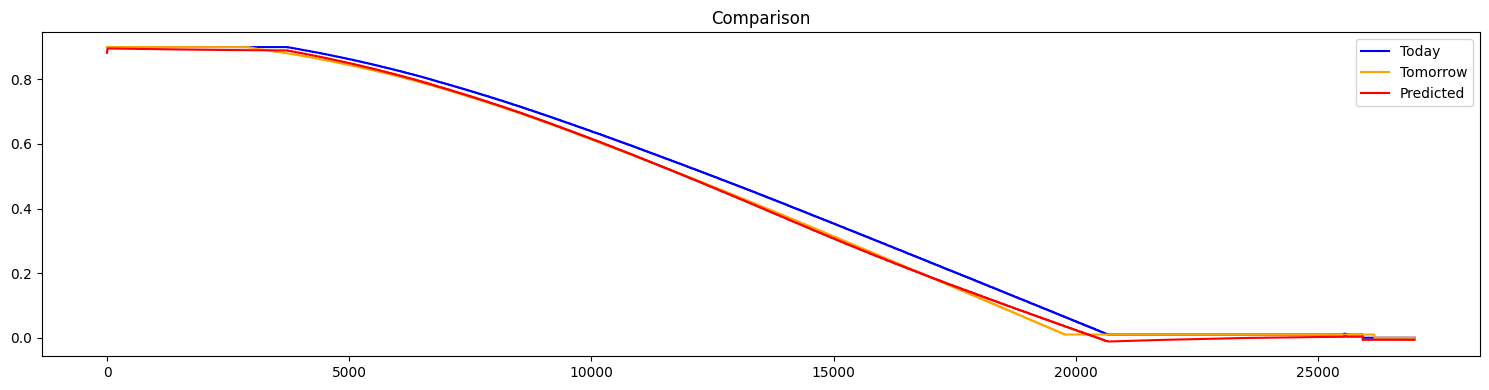

today(intensity=0.6), tomorrow(intensity=0.7)
MSE Loss = 0.00010910466517088935
delta_pred mean = -0.02323729544878006
tomorrow-today mean = -0.021678047254681587


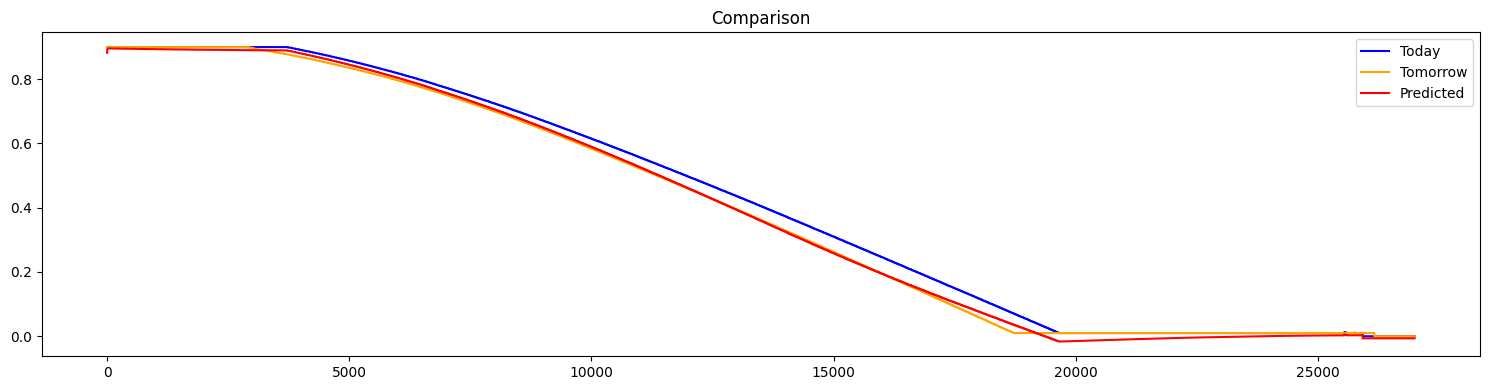

today(intensity=0.7), tomorrow(intensity=0.8)
MSE Loss = 0.00017198827117681503
delta_pred mean = -0.02398059330880642
tomorrow-today mean = -0.02354356087744236


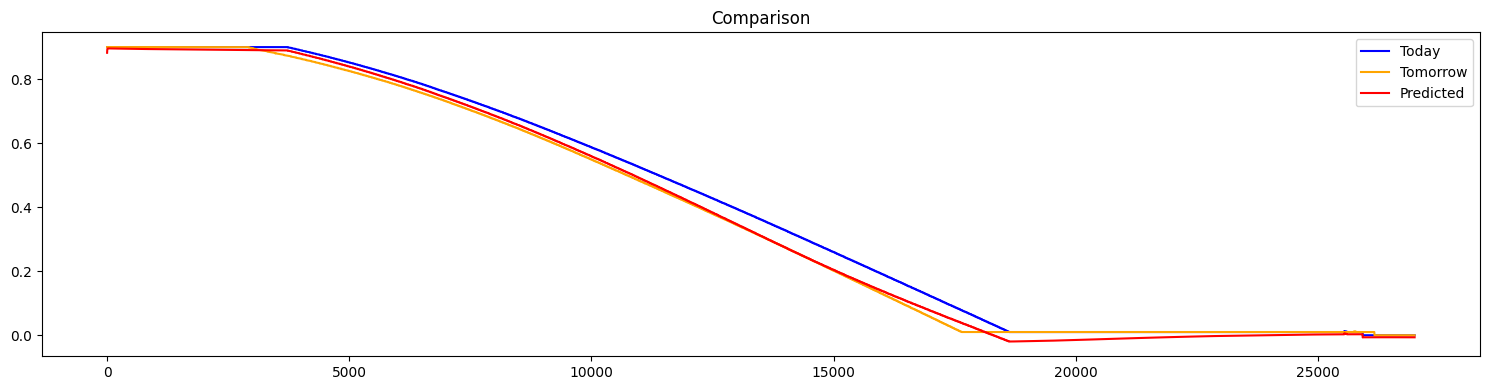

today(intensity=0.8), tomorrow(intensity=0.9)
MSE Loss = 0.00028348880005069077
delta_pred mean = -0.024110907688736916
tomorrow-today mean = -0.02549746073782444


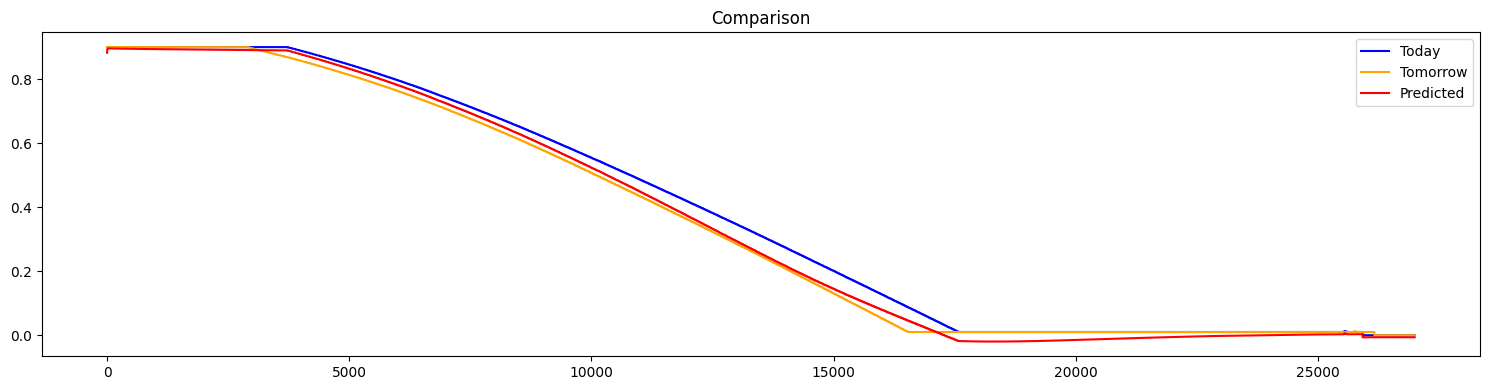

today(intensity=0.9), tomorrow(intensity=1.0)
MSE Loss = 0.00046228160499595106
delta_pred mean = -0.023507360368967056
tomorrow-today mean = -0.027583342045545578


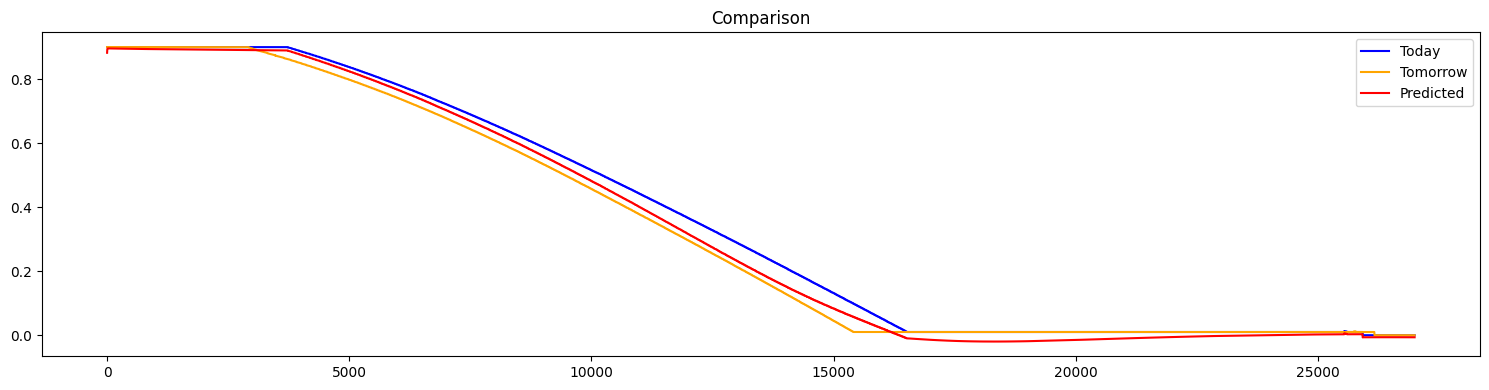

./data/train_result_filtered/lr1e-4_lambda1_0.1_55000_82000_0908_syn3
today(intensity=0), tomorrow(intensity=0)
MSE Loss = 0.0004427686217240989
delta_pred mean = -0.007549533154815435
tomorrow-today mean = 0.006074889563024044


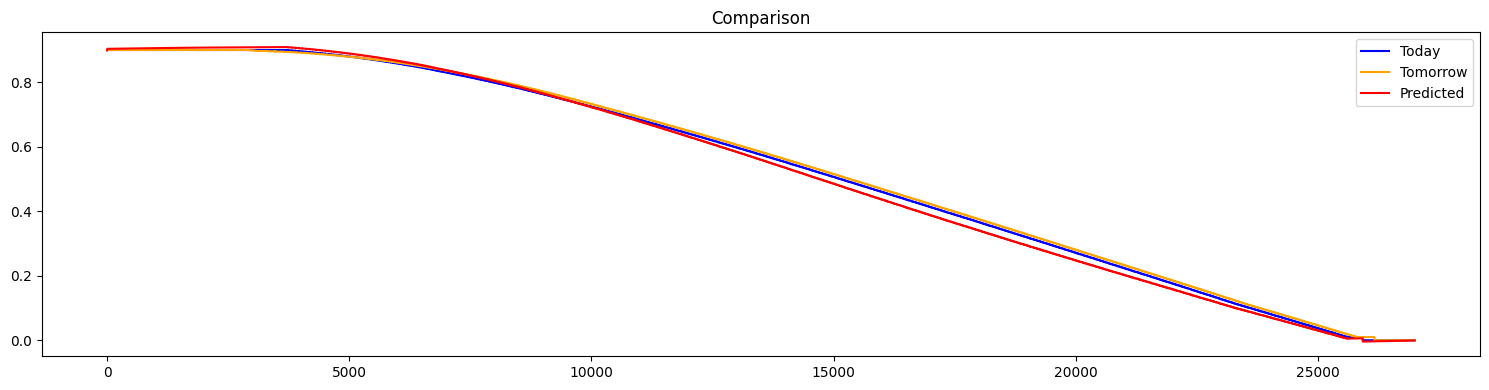

today(intensity=0.1), tomorrow(intensity=0.2)
MSE Loss = 0.0001011050699162297
delta_pred mean = -0.007751766592264175
tomorrow-today mean = -0.014056509360671043


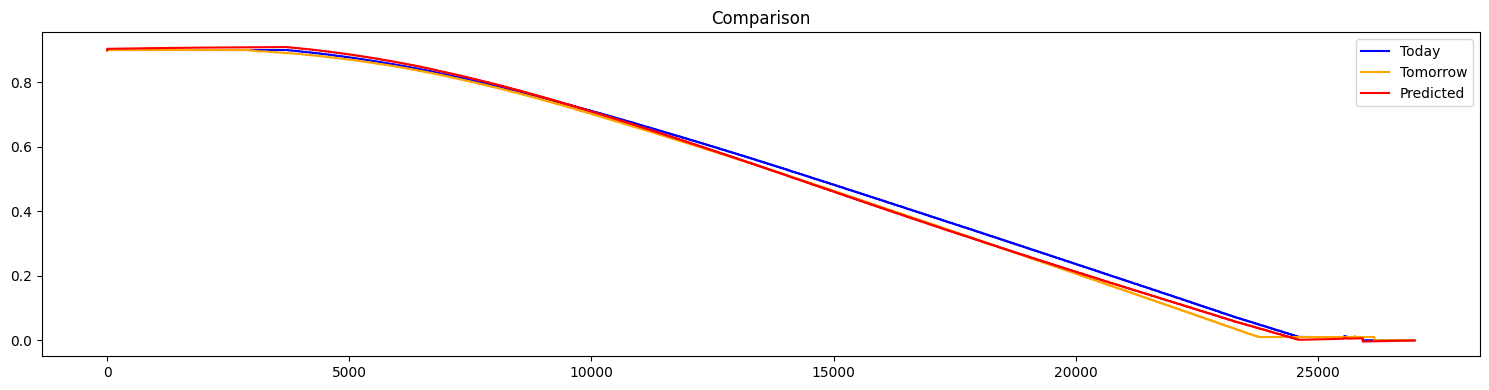

today(intensity=0.2), tomorrow(intensity=0.3)
MSE Loss = 0.00012180649355286732
delta_pred mean = -0.007965270429849625
tomorrow-today mean = -0.015302927233278751


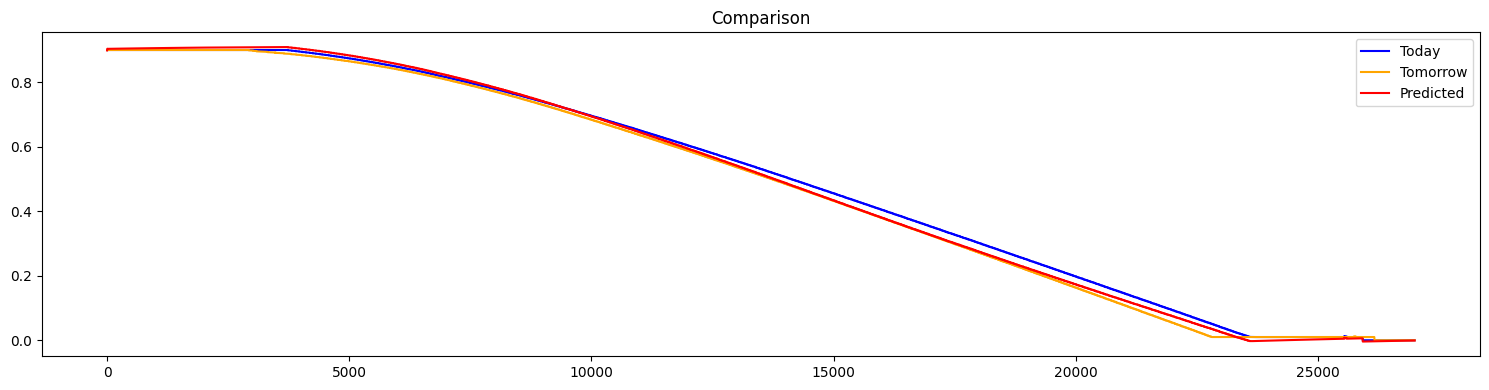

today(intensity=0.3), tomorrow(intensity=0.4)
MSE Loss = 0.0001676762622082606
delta_pred mean = -0.008190113119781017
tomorrow-today mean = -0.016759783029556274


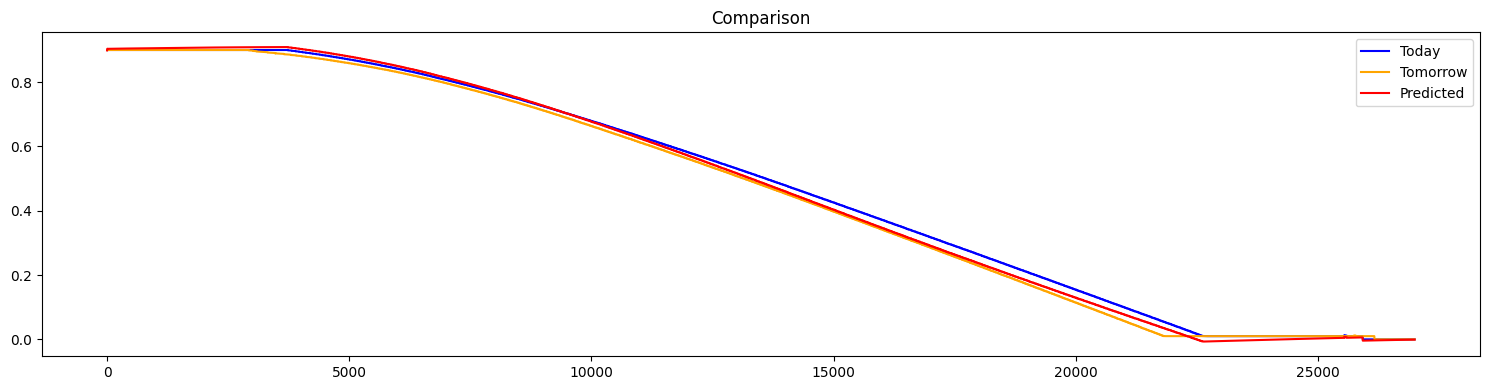

today(intensity=0.4), tomorrow(intensity=0.5)
MSE Loss = 0.00024313354515470564
delta_pred mean = -0.008426712825894356
tomorrow-today mean = -0.018289899453520775


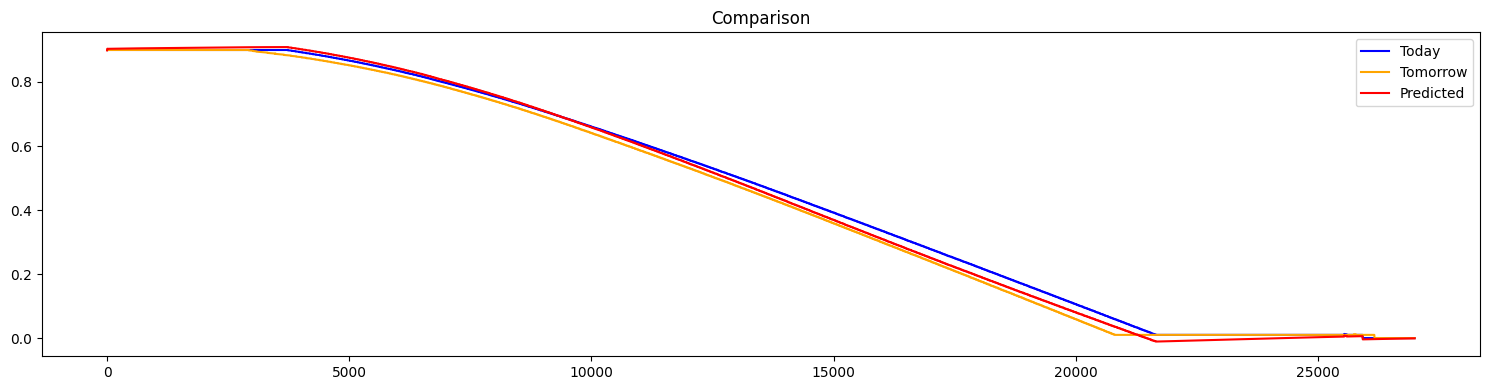

today(intensity=0.5), tomorrow(intensity=0.6)
MSE Loss = 0.0003593498549889773
delta_pred mean = -0.008674411103129387
tomorrow-today mean = -0.0199397262185812


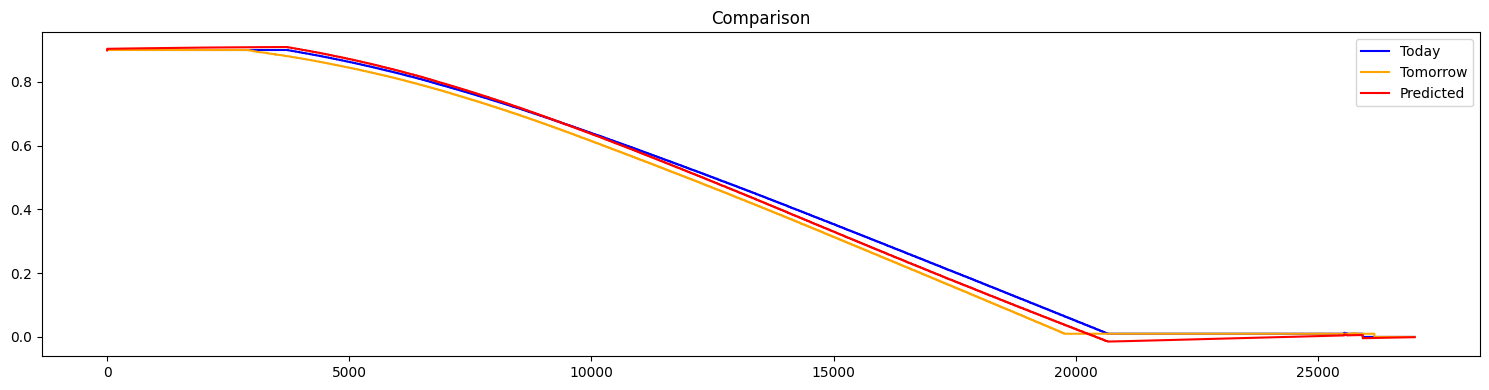

today(intensity=0.6), tomorrow(intensity=0.7)
MSE Loss = 0.0005261775222606957
delta_pred mean = -0.008932066150009632
tomorrow-today mean = -0.021678047254681587


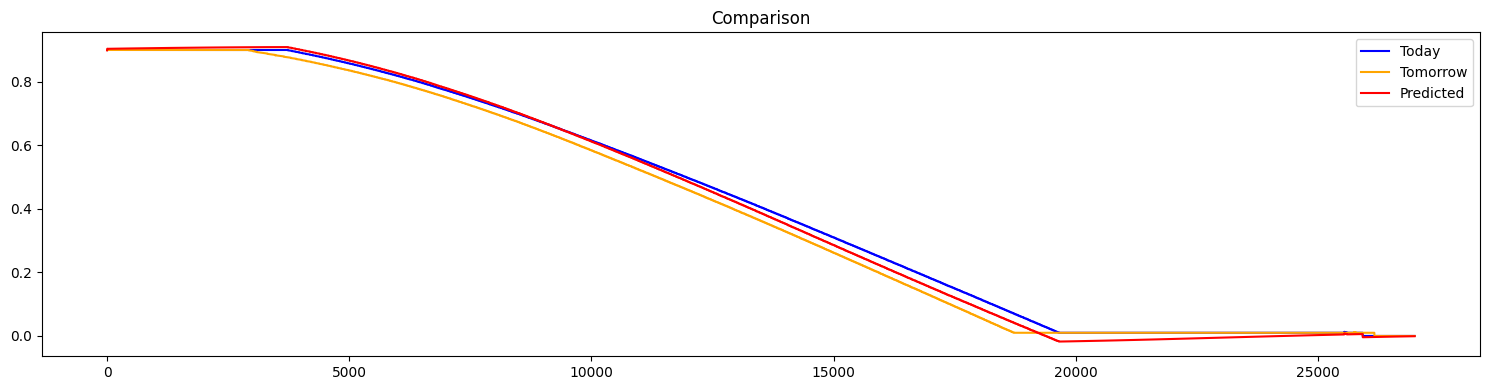

today(intensity=0.7), tomorrow(intensity=0.8)
MSE Loss = 0.0007592297624796629
delta_pred mean = -0.009198063053190708
tomorrow-today mean = -0.02354356087744236


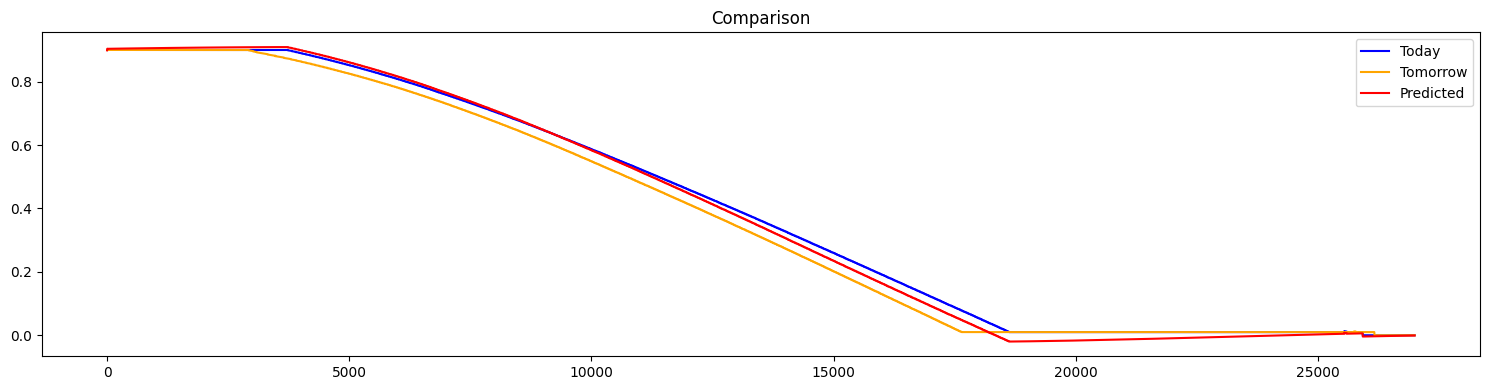

today(intensity=0.8), tomorrow(intensity=0.9)
MSE Loss = 0.0010728583438321948
delta_pred mean = -0.009470228105783463
tomorrow-today mean = -0.02549746073782444


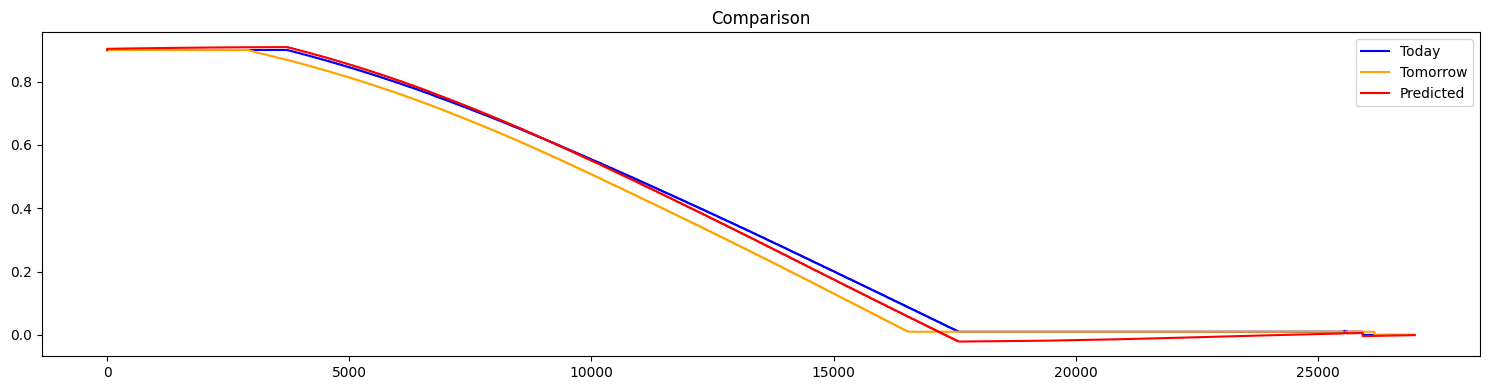

today(intensity=0.9), tomorrow(intensity=1.0)
MSE Loss = 0.001489829970523715
delta_pred mean = -0.009745795279741287
tomorrow-today mean = -0.027583342045545578


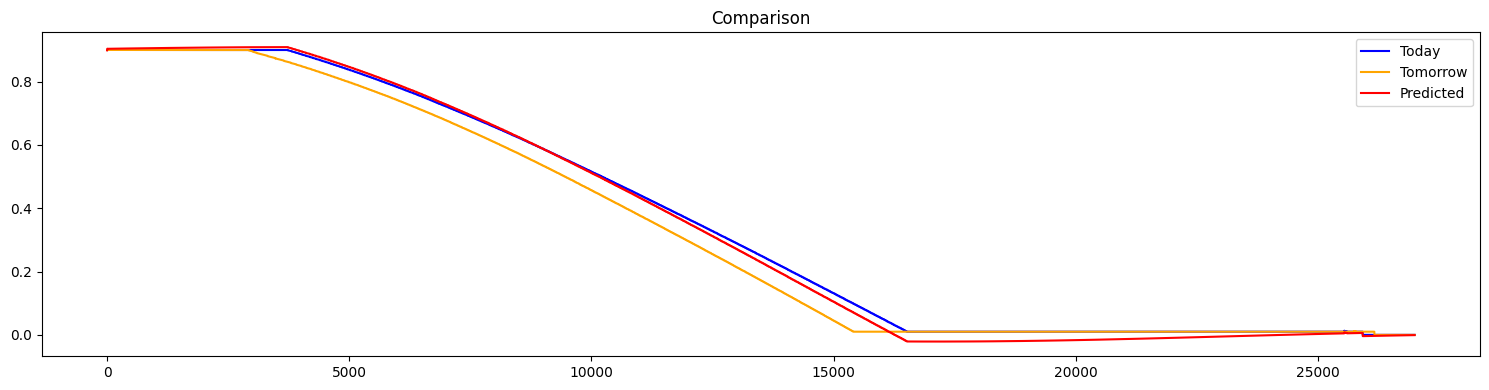

./data/train_result_filtered/lr1e-3_lambda1_0.2_55000_82000_0908_syn3_mae
today(intensity=0), tomorrow(intensity=0)
MSE Loss = 0.0005372011219151318
delta_pred mean = -0.012821583077311516
tomorrow-today mean = 0.006074889563024044


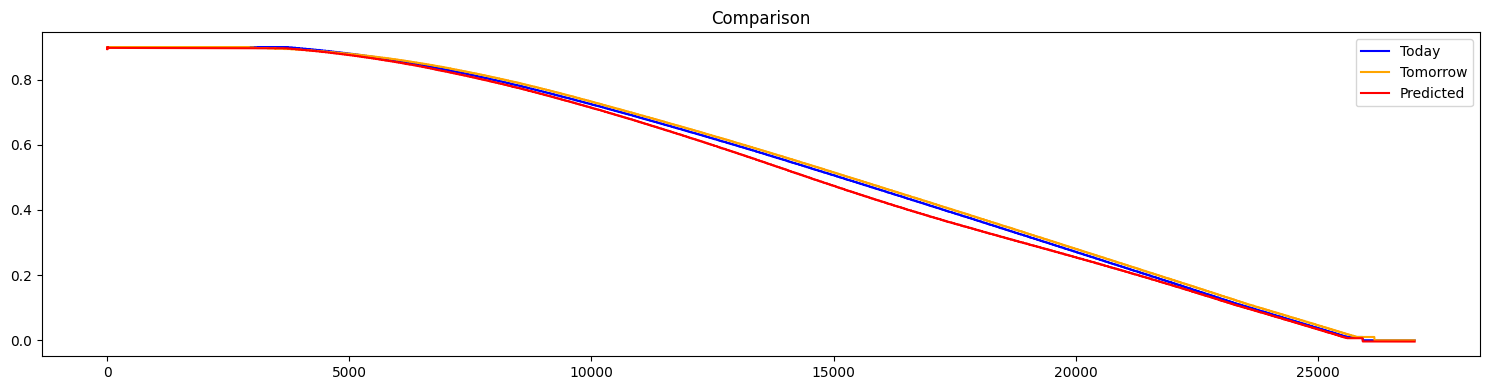

today(intensity=0.1), tomorrow(intensity=0.2)
MSE Loss = 0.00014080839173402637
delta_pred mean = -0.013467682525515556
tomorrow-today mean = -0.014056509360671043


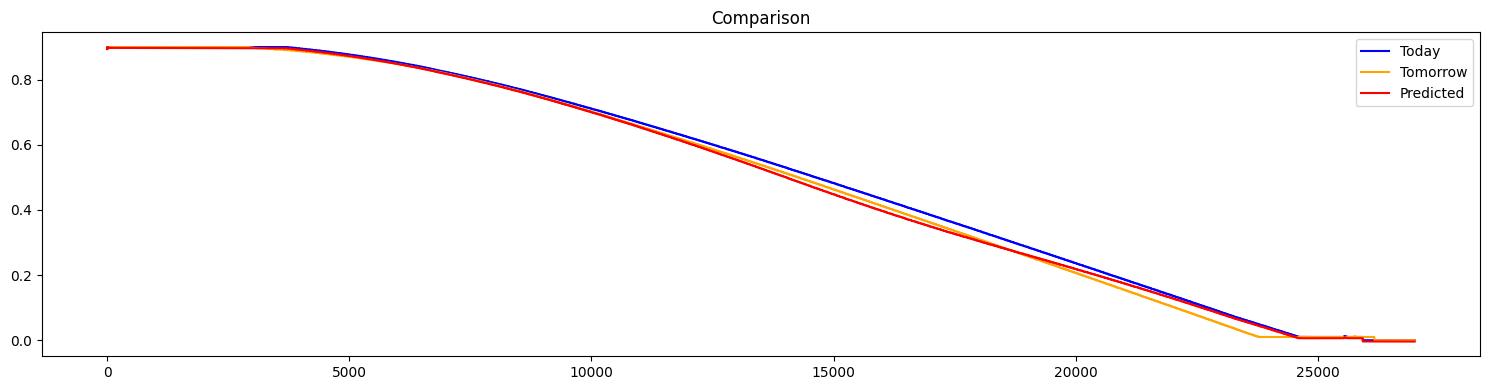

today(intensity=0.2), tomorrow(intensity=0.3)
MSE Loss = 0.00012001521827187389
delta_pred mean = -0.014211663044989109
tomorrow-today mean = -0.015302927233278751


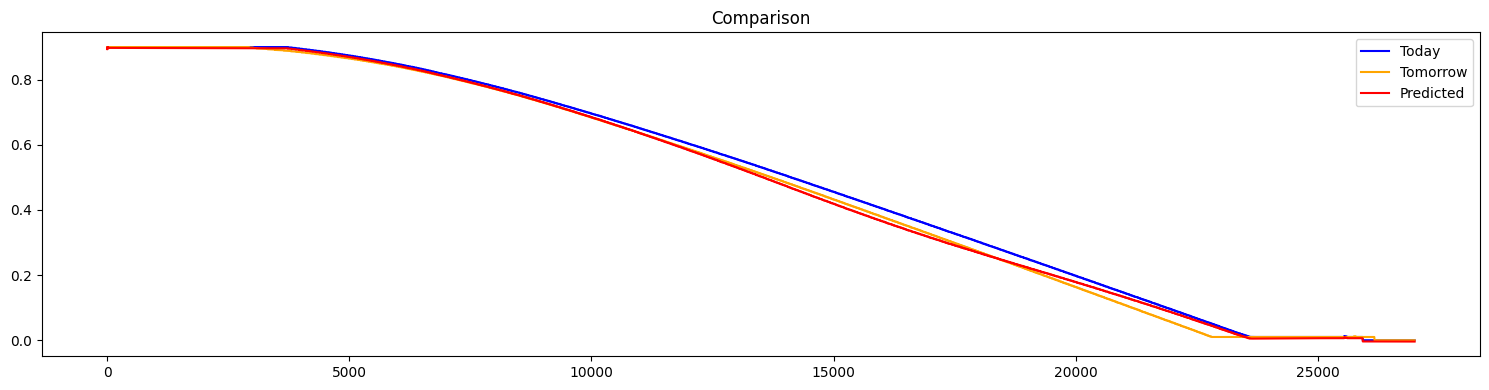

today(intensity=0.3), tomorrow(intensity=0.4)
MSE Loss = 0.00010234698129352182
delta_pred mean = -0.015070230700075626
tomorrow-today mean = -0.016759783029556274


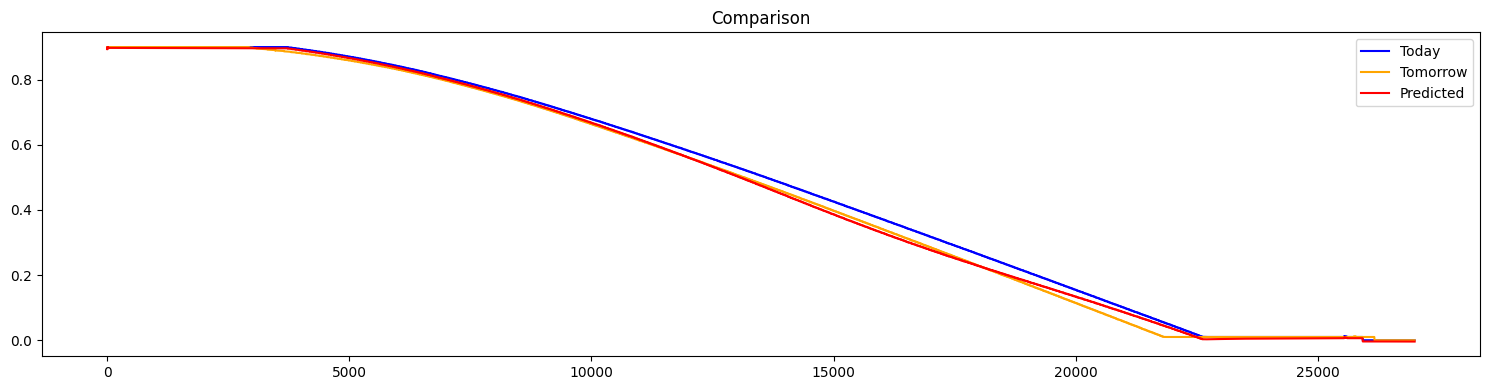

today(intensity=0.4), tomorrow(intensity=0.5)
MSE Loss = 8.954775694292039e-05
delta_pred mean = -0.01605954021215439
tomorrow-today mean = -0.018289899453520775


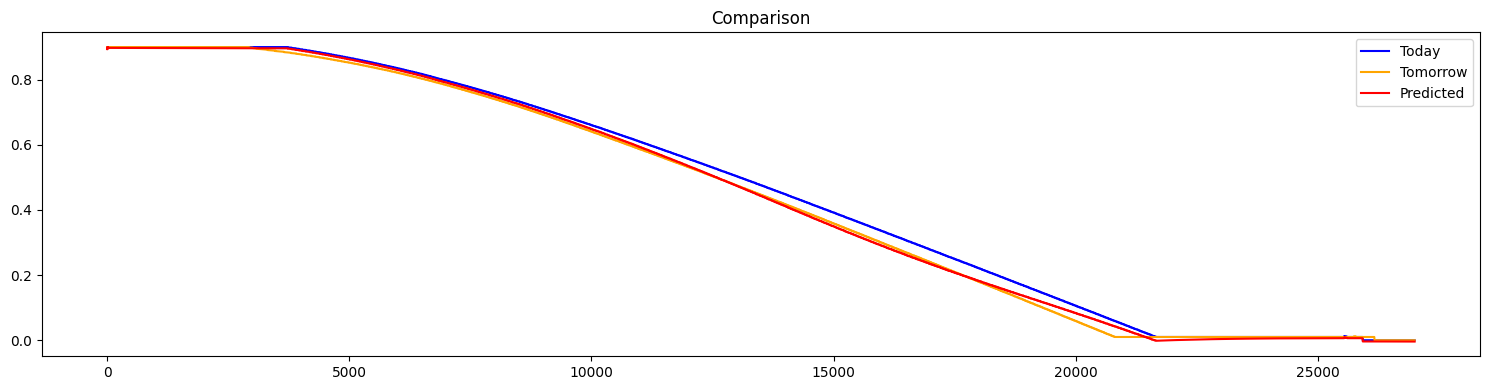

today(intensity=0.5), tomorrow(intensity=0.6)
MSE Loss = 9.746024443302304e-05
delta_pred mean = -0.017188172787427902
tomorrow-today mean = -0.0199397262185812


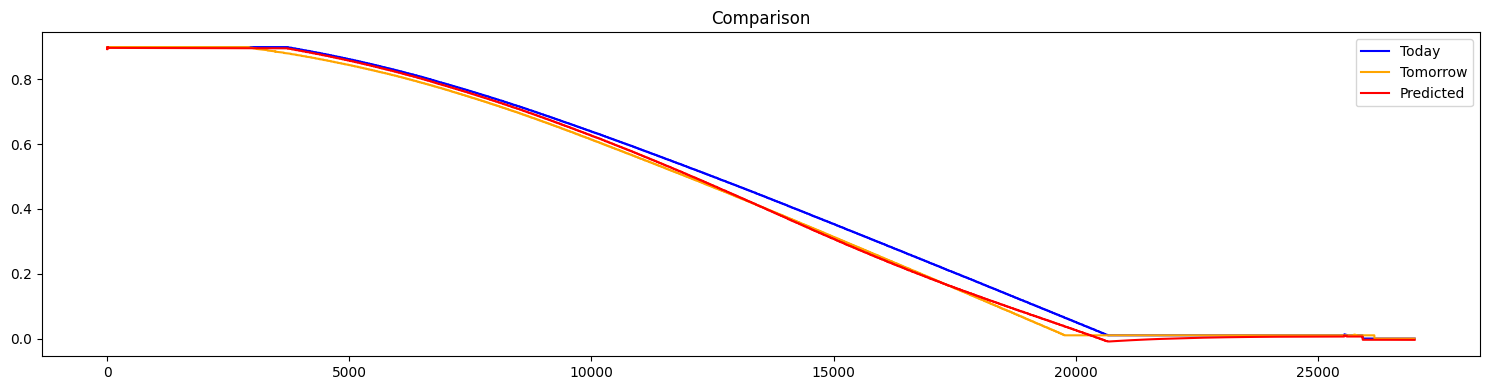

today(intensity=0.6), tomorrow(intensity=0.7)
MSE Loss = 0.00015324221749324352
delta_pred mean = -0.018446434289216995
tomorrow-today mean = -0.021678047254681587


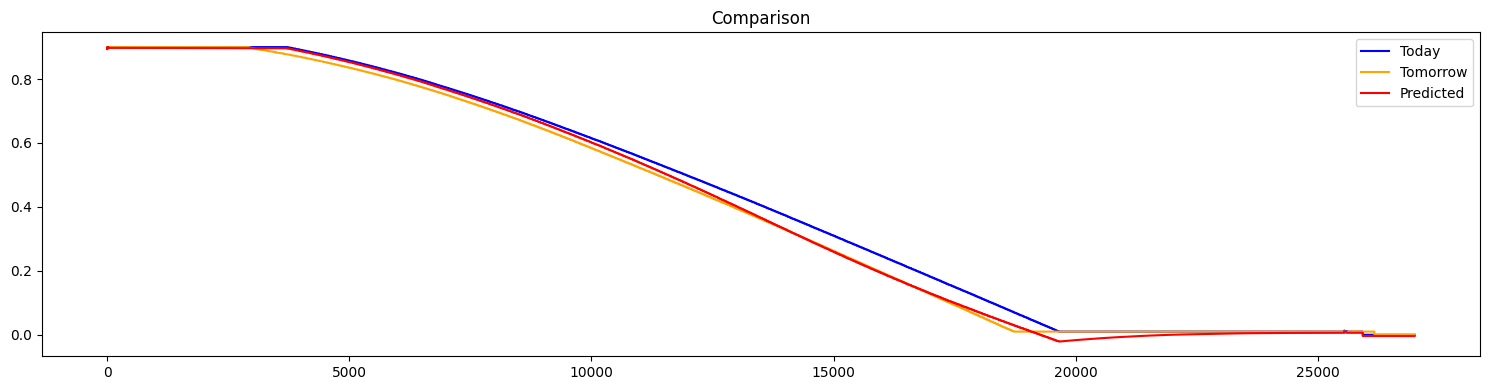

today(intensity=0.7), tomorrow(intensity=0.8)
MSE Loss = 0.0002960801066365093
delta_pred mean = -0.01979551650583744
tomorrow-today mean = -0.02354356087744236


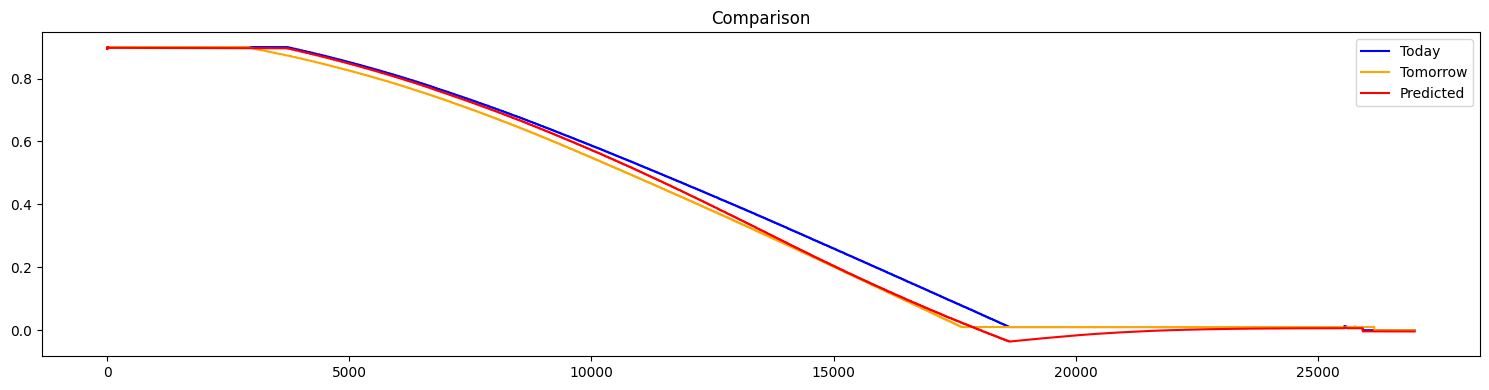

today(intensity=0.8), tomorrow(intensity=0.9)
MSE Loss = 0.0005608604406006634
delta_pred mean = -0.021174676716327667
tomorrow-today mean = -0.02549746073782444


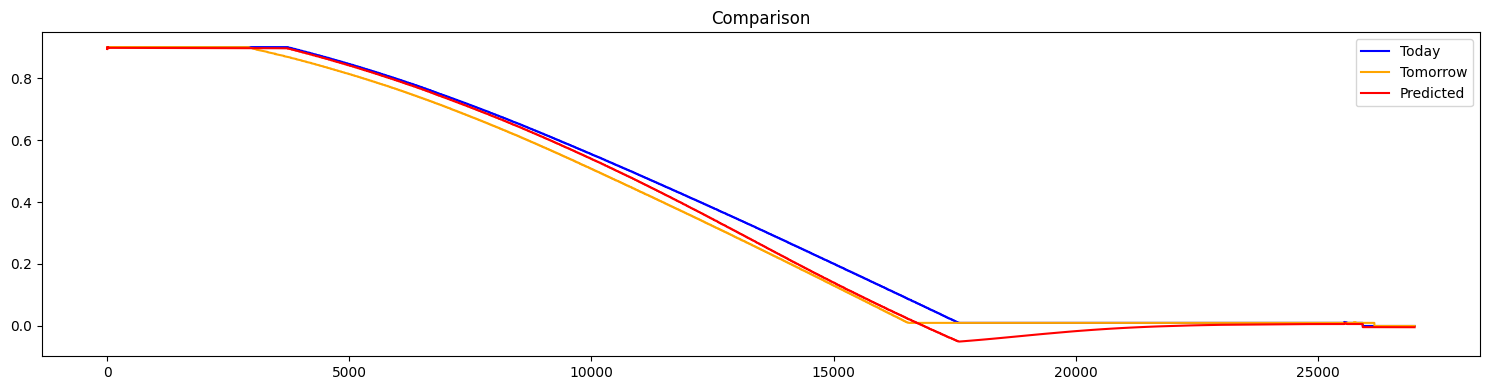

today(intensity=0.9), tomorrow(intensity=1.0)
MSE Loss = 0.0009721466340124607
delta_pred mean = -0.02253369614481926
tomorrow-today mean = -0.027583342045545578


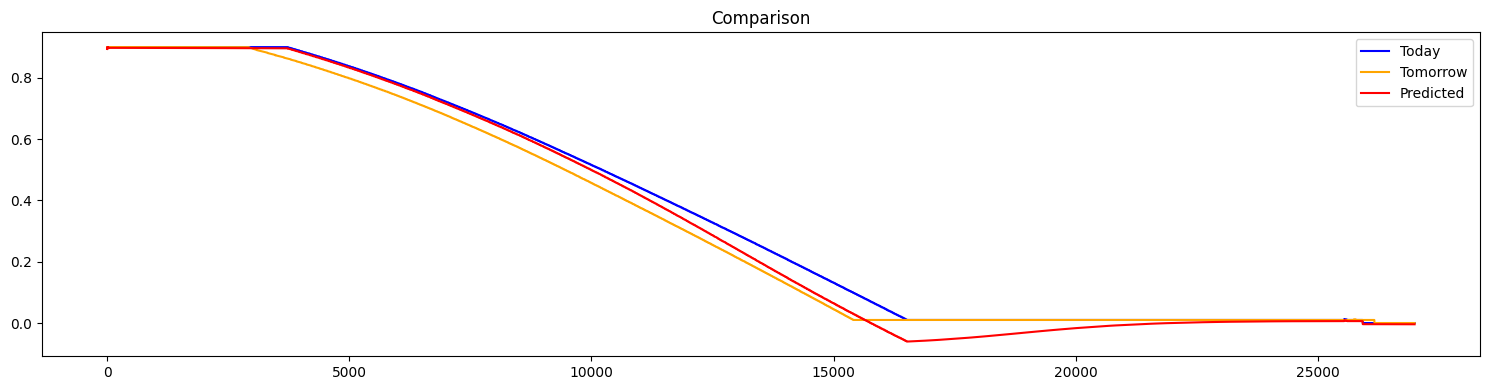

In [ ]:
MEAN = 0.2866035067802633
ALL = glob.glob("./data/train_result/*")

pre_tomorrow_nps_bundle = [] # need for below replacement
for pretrained_folder in ALL:
    print(pretrained_folder)
    args_path = os.path.join(pretrained_folder, 'args.json')
    ckpt = os.path.join(pretrained_folder, 'best.pth.tar')
    # ckpt = os.path.join(pretrained_folder, 'best.pth.tar')
    loss = os.path.join(pretrained_folder, 'loss.txt')

    with open(args_path, 'r') as f:
        args = json.load(f)

    from dataset import *
    device = torch.device('cuda:{}'.format(args['gpu_id']))
    model = lstm_generator(input_dim=3, 
                            hidden=256, 
                            layers=args['num_layers'], 
                            dropout=0. , 
                            output_dim=1).to(device)

    ckpt = torch.load(ckpt, map_location=device)
    model.load_state_dict(ckpt["model"])
    model.eval()

    test_dir = './data/SoC_synthesis3'
    test_dataset  = Generation_Dataset(test_dir,  train=False, transform=Normalize(), end=82000)
    nw = 0
    common = dict(
        batch_size=1,
        shuffle=False,
        num_workers=nw,
        pin_memory=True,
        persistent_workers=False,   
        prefetch_factor=2,          
        drop_last=False,            # 긴 시퀀스면 True 권장
        # multiprocessing_context="spawn"  # 문제시 명시, 아니면 일단 생략
    )
    test_loader  = DataLoader(test_dataset,  **common)

    pre_tomorrow_nps = [] # need for below replacement
    today_nps = []
    for i, (today, tomorrow) in enumerate(test_loader):
        if i == 0:
            print("today(intensity=0), tomorrow(intensity=0)")
        else:
            print(f"today(intensity={i/10}), tomorrow(intensity={(i+1)/10})")
        
        today = today.to(device, non_blocking=True).float()      # [B,T,1]
        tomorrow = tomorrow.to(device, non_blocking=True).float()

        T = today.size(1)
        t = torch.arange(T, device=today.device).float().view(T, 1)
        sin_t = torch.sin(2*math.pi*t/T)
        cos_t = torch.cos(2*math.pi*t/T)
        today = torch.cat([today, sin_t.expand_as(today), cos_t.expand_as(today)], dim=-1)  # [T,3]. today with time
        
        delta_pred, _ = model(today)   # 예측값
        pre_tomorrow = today[:,:,0:1] + delta_pred
        loss_fn = nn.MSELoss()
        print(f"MSE Loss = {loss_fn(tomorrow, pre_tomorrow).item()}")


        # numpy 변환
        today_np = today[:,:,0].squeeze(0).detach().cpu().numpy()
        tomorrow_np = tomorrow.squeeze(-1).squeeze(0).detach().cpu().numpy()
        pre_tomorrow_np = pre_tomorrow.squeeze(-1).squeeze(0).detach().cpu().numpy()

        # un-normalize
        today_np += MEAN
        tomorrow_np += MEAN
        pre_tomorrow_np += MEAN

        pre_tomorrow_nps.append(pre_tomorrow_np)
        today_nps.append(today_np)

        fig, axes = plt.subplots(1, 1, figsize=(15, 4))

        # 3) 같이 그리기
        axes.plot(today_np, label="Today", color="blue")
        axes.plot(tomorrow_np, label="Tomorrow", color="orange")
        axes.plot(pre_tomorrow_np, label="Predicted", color="red")
        axes.legend()
        axes.set_title("Comparison")
        # axes.set_ylim([-0.3, 0.3])
        # axes.set_xlim([s1, e1])

        print(f"delta_pred mean = {torch.mean(delta_pred)}")
        print(f"tomorrow-today mean = {np.mean((tomorrow_np-today_np))}")


        plt.tight_layout()
        plt.show()
    pre_tomorrow_nps_bundle.append(pre_tomorrow_nps)

10
0.89194834


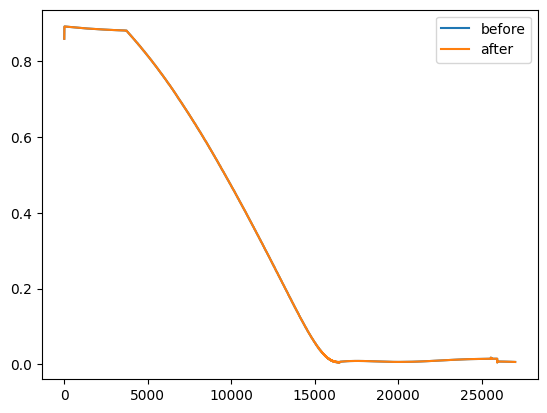

0.8934551


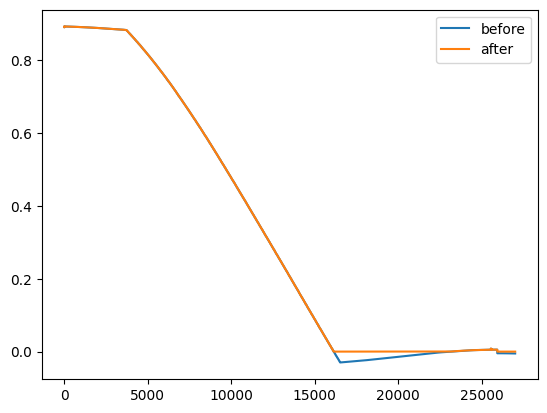

0.8957654


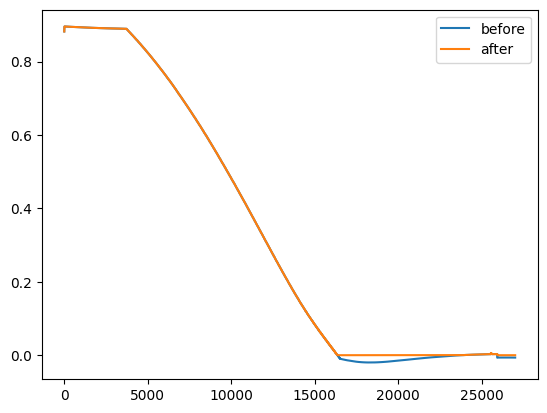

0.90913963


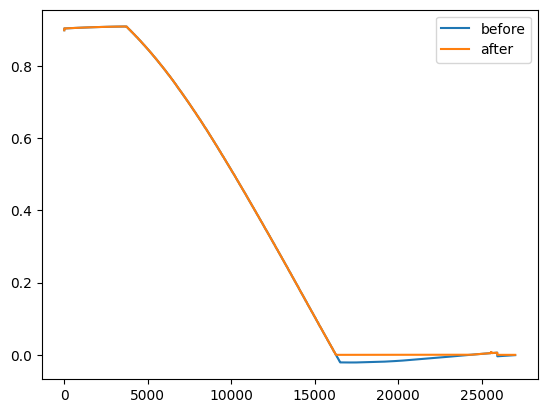

0.89954615


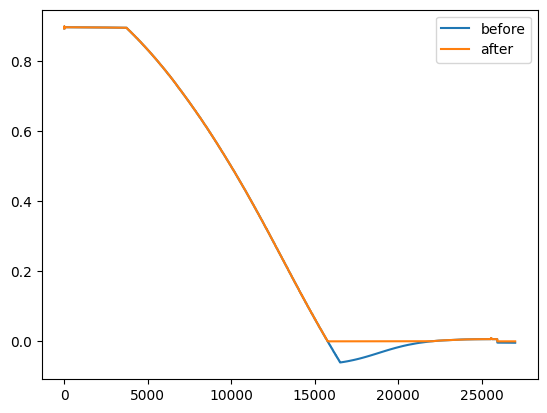

Applying ReLU-like operation is working on.......


100%|██████████| 5/5 [00:00<00:00, 1059.97it/s]


In [10]:
# Apply Modification if needed.

modify = True

print(len(pre_tomorrow_nps_bundle[0]))

# check before and after
for i in range(len(pre_tomorrow_nps_bundle)):
    # print(i)
    arr = pre_tomorrow_nps_bundle[i][9]
    print(np.max(arr))
    plt.plot(arr, label='before')
    plt.plot(np.maximum(0, arr), label='after')
    plt.legend()
    plt.show()

# modify
if modify:
    print("Applying ReLU-like operation is working on.......")
    for i in tqdm(range(len(pre_tomorrow_nps_bundle))):
        for j in range(10):
            arr = pre_tomorrow_nps_bundle[i][j]
            modified_arr = np.maximum(0, arr)
            pre_tomorrow_nps_bundle[i][j] = modified_arr

### Replace exist data's SoC with predicted(model's output)

./data/generated/lr1e-4_lambda1_0.1_whole_data.npy


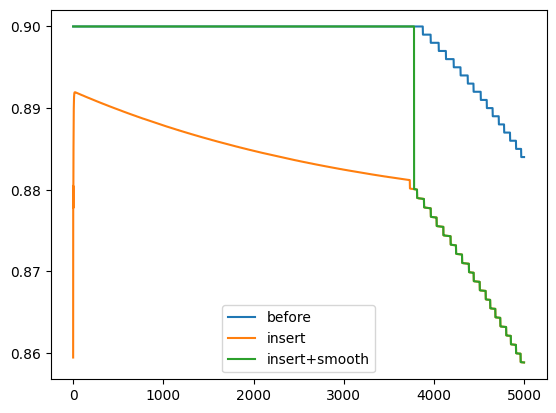

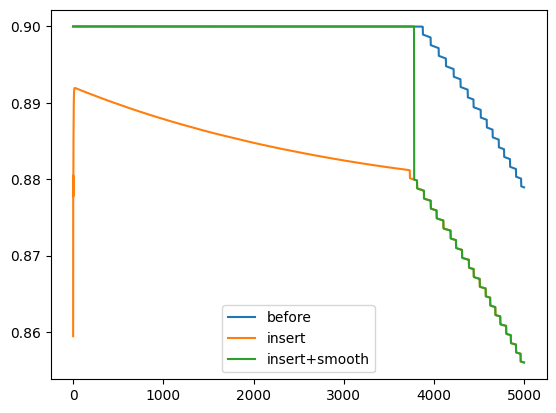

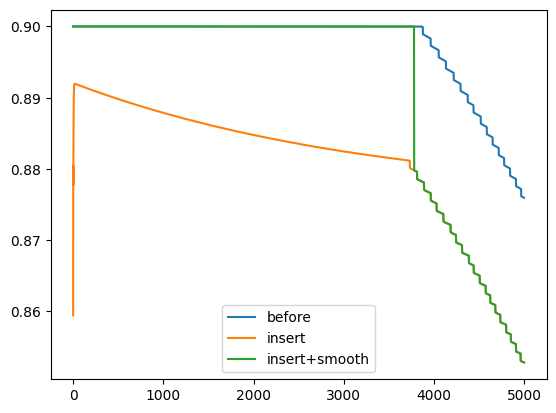

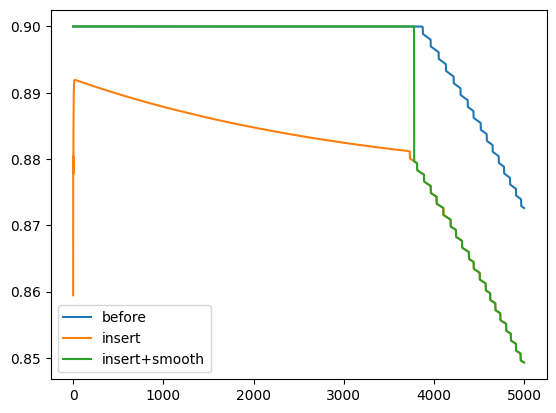

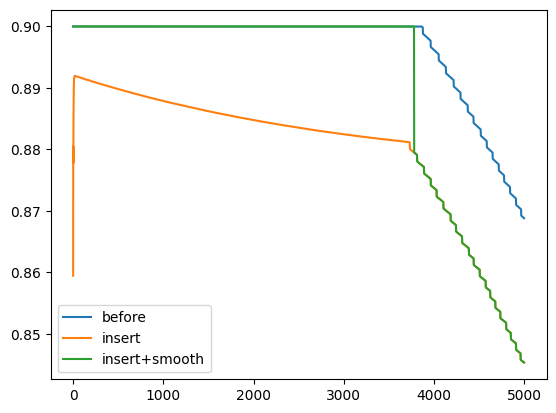

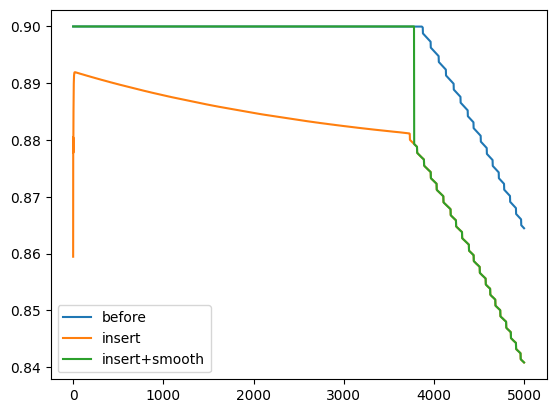

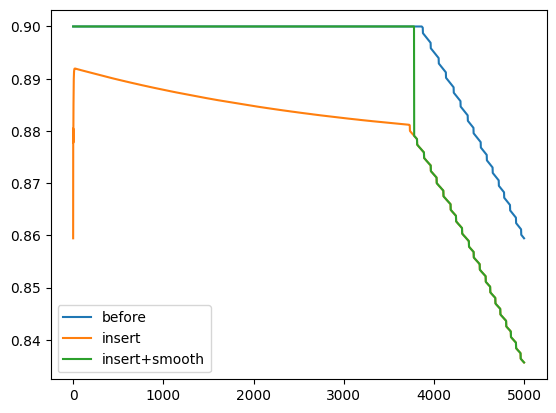

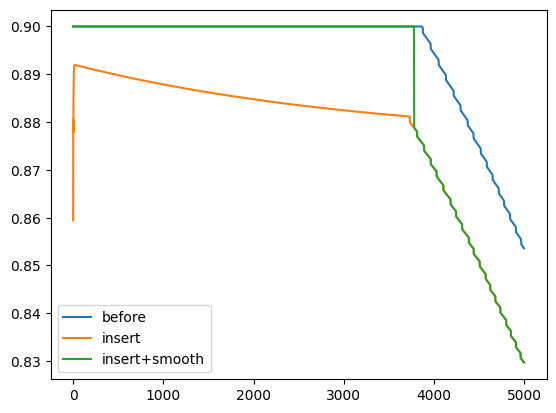

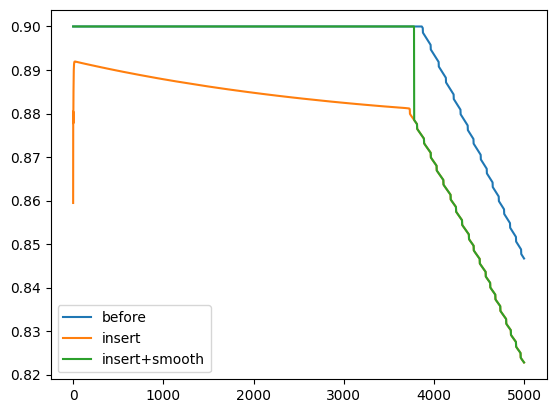

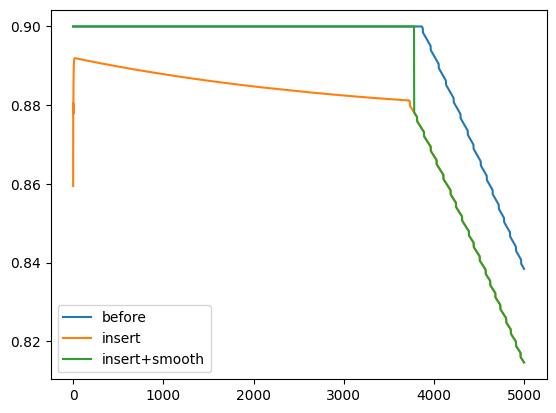

./data/generated/lr1e-4_lambda1_0.1_55000_82000_0908.npy


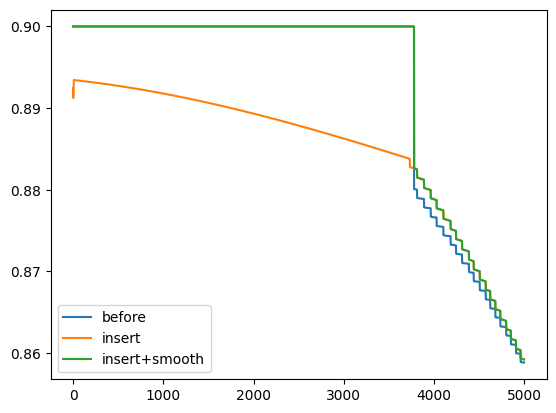

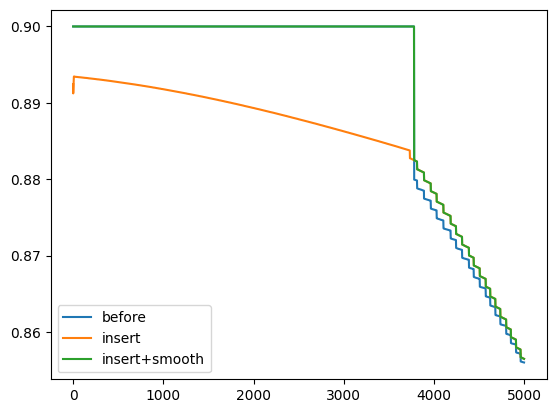

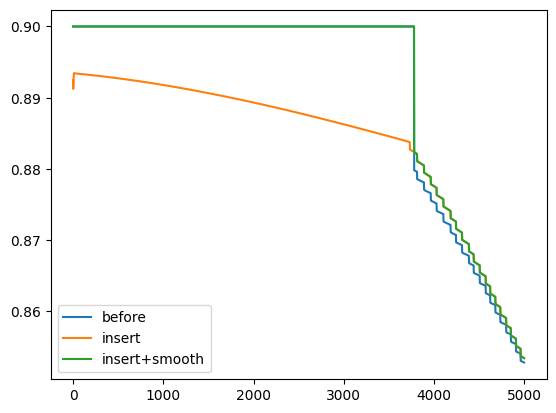

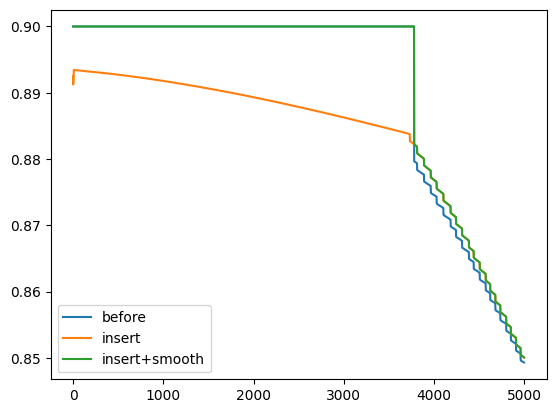

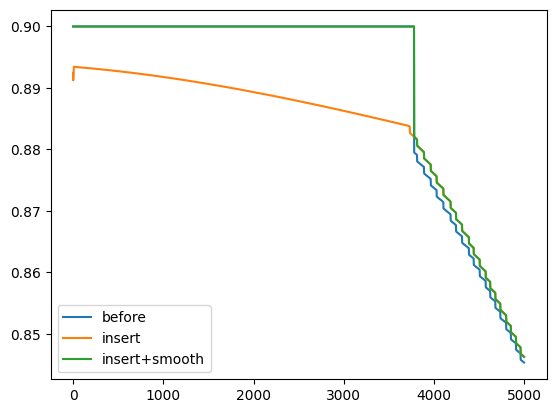

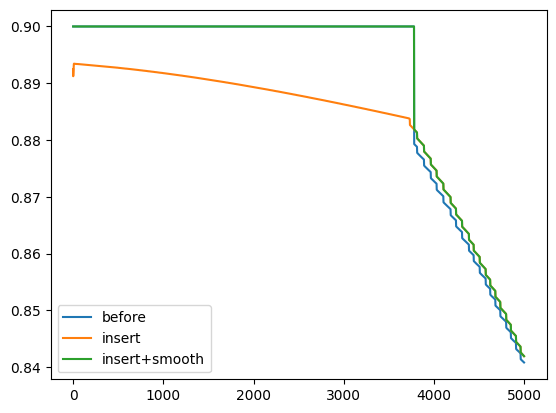

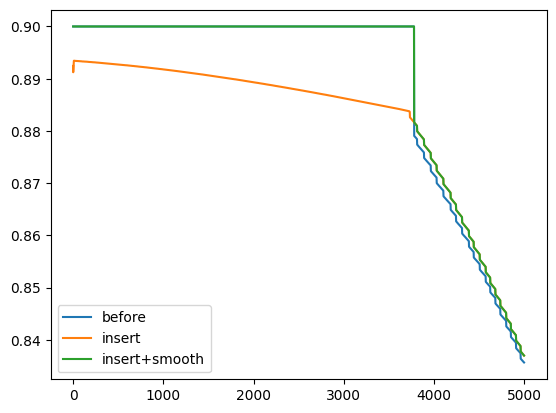

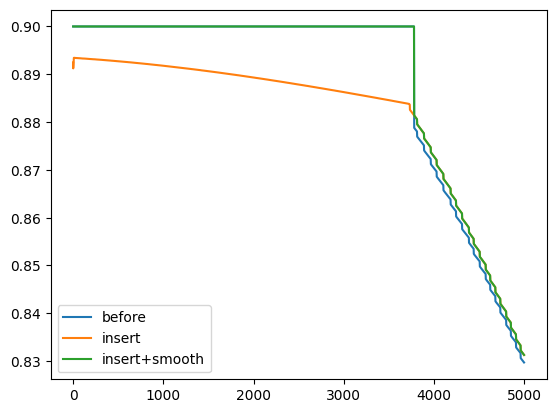

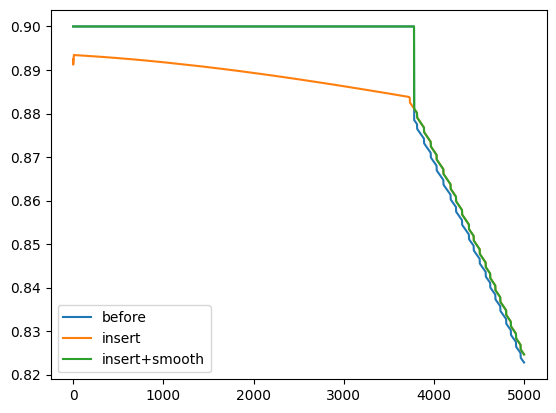

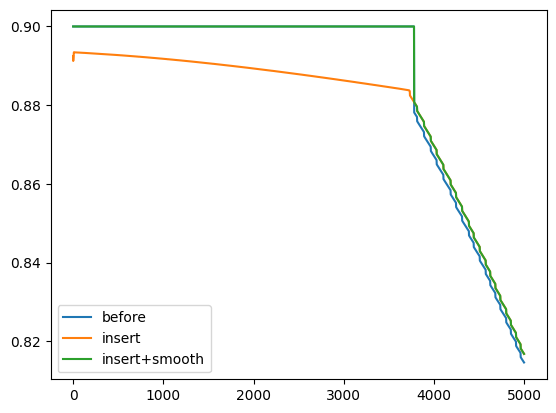

./data/generated/lr1e-4_lambda1_0.05_55000_82000_0908_syn3_mse.npy


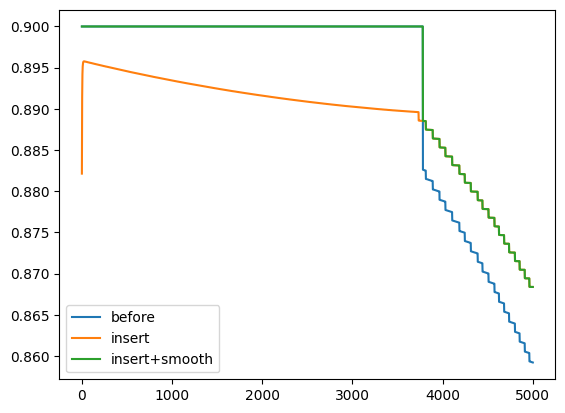

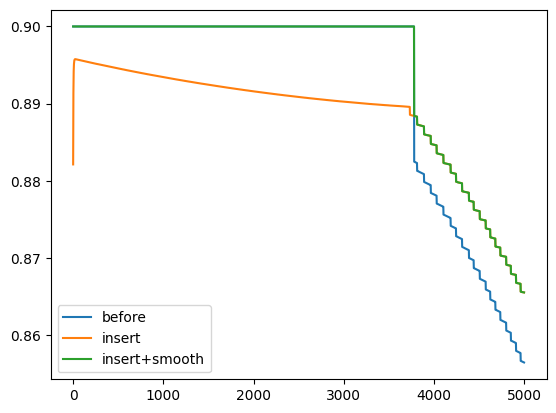

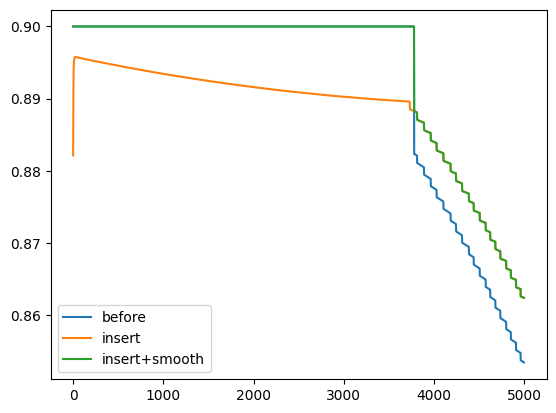

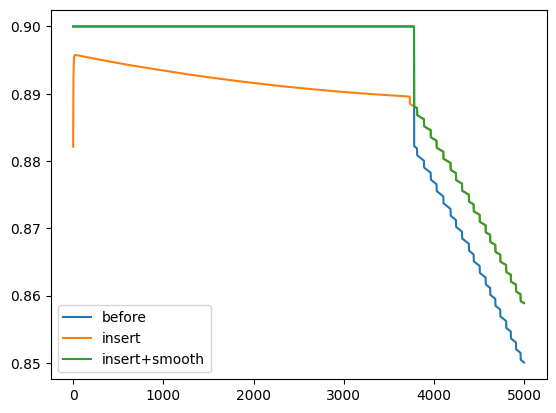

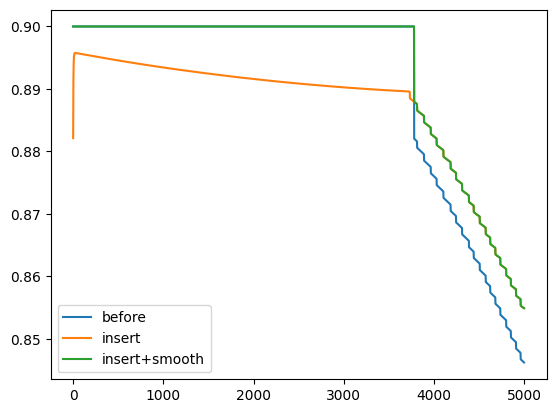

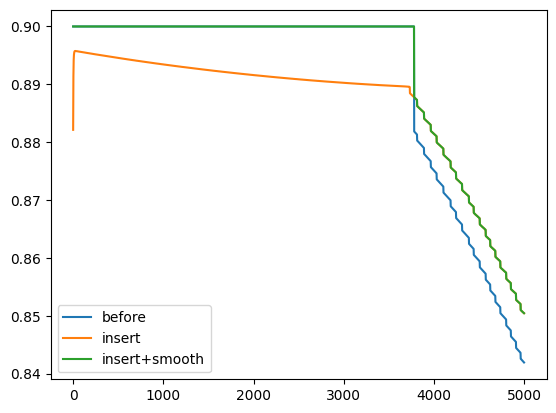

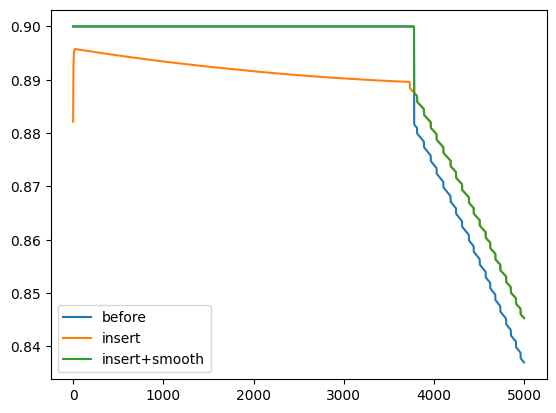

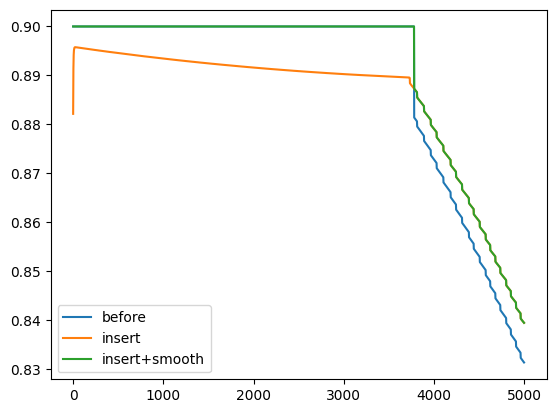

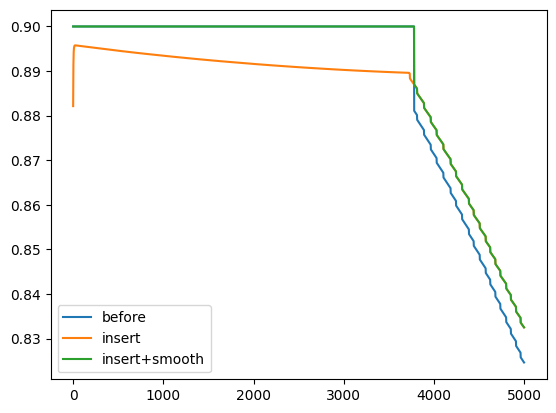

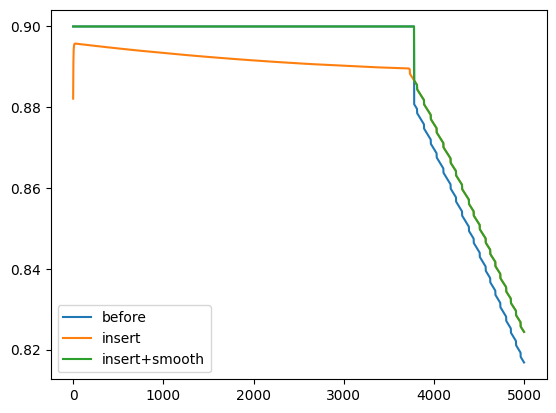

./data/generated/lr1e-4_lambda1_0.1_55000_82000_0908_syn3.npy


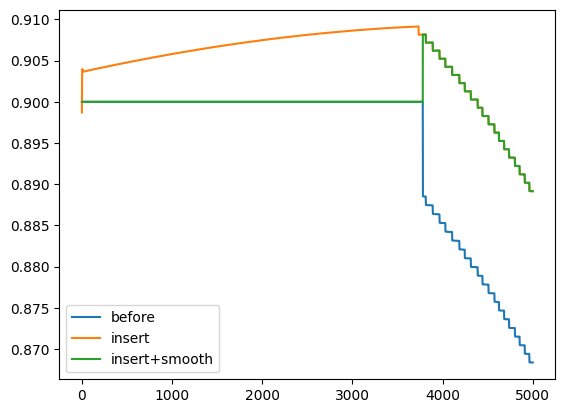

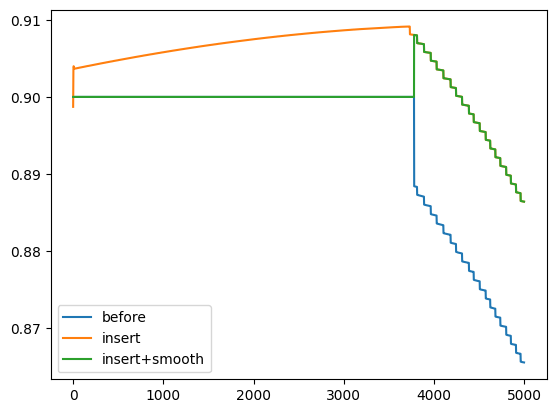

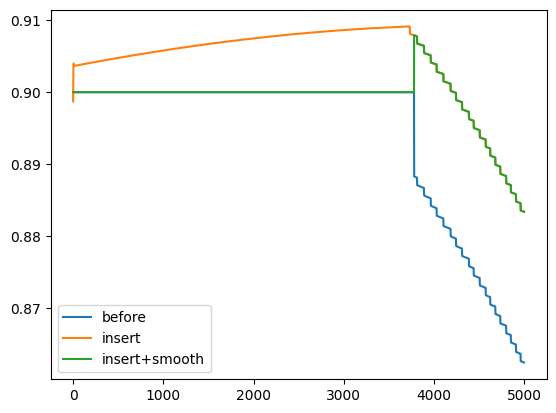

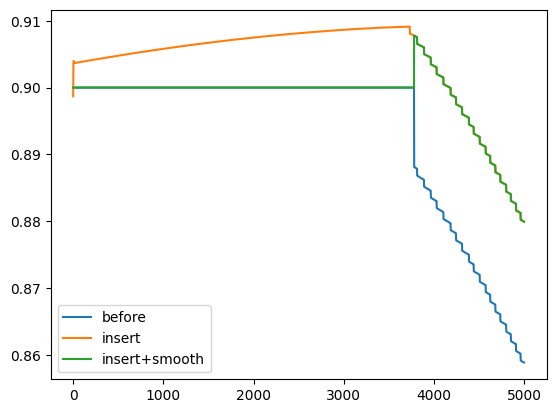

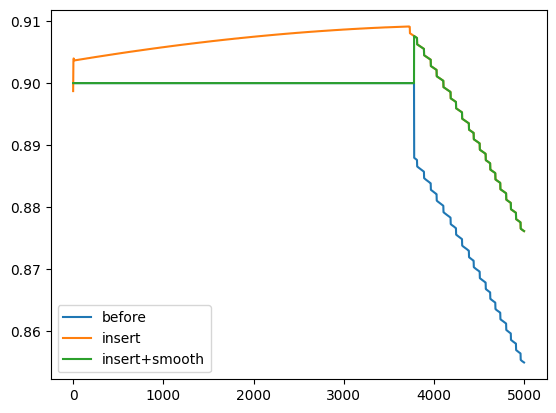

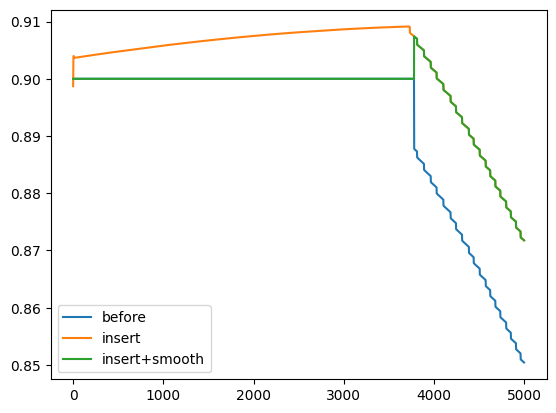

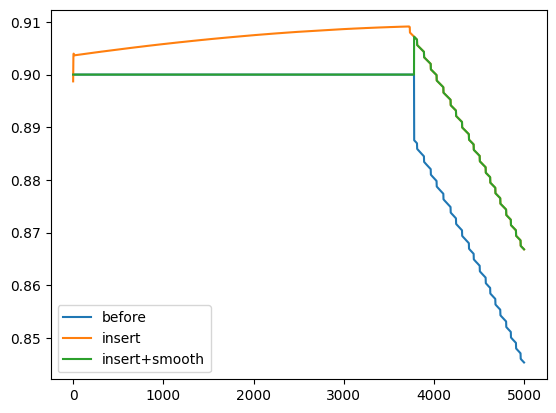

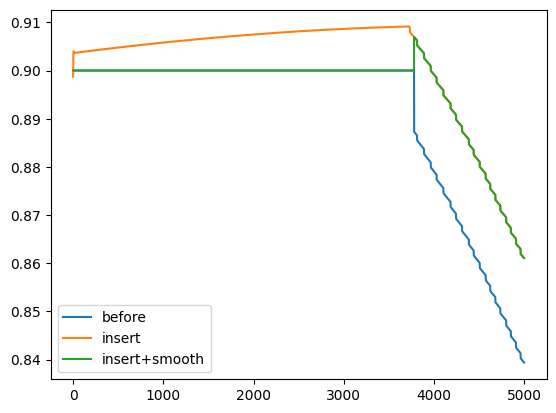

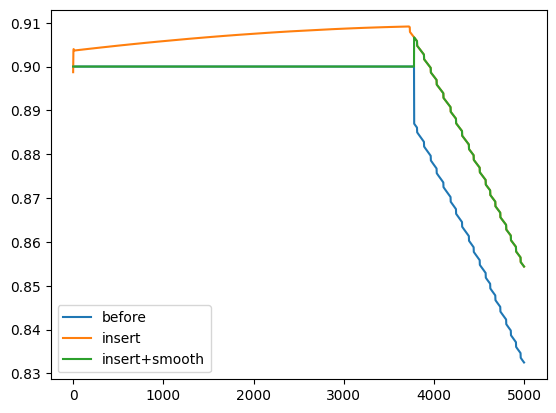

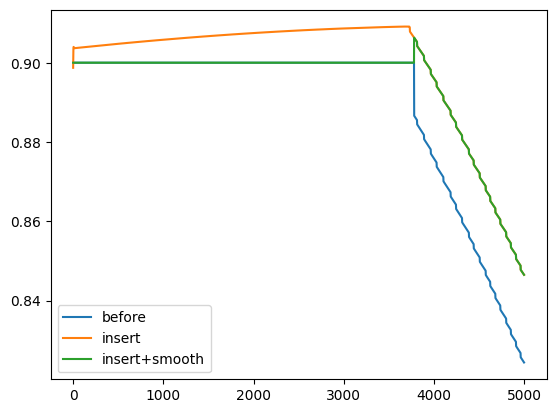

./data/generated/lr1e-3_lambda1_0.2_55000_82000_0908_syn3_mae.npy


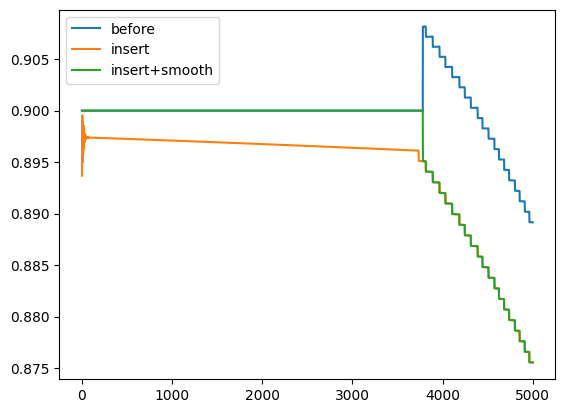

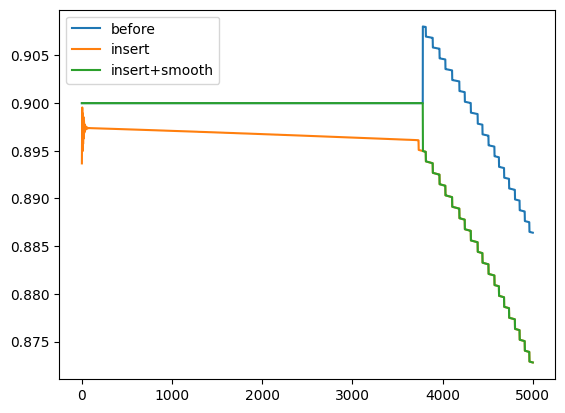

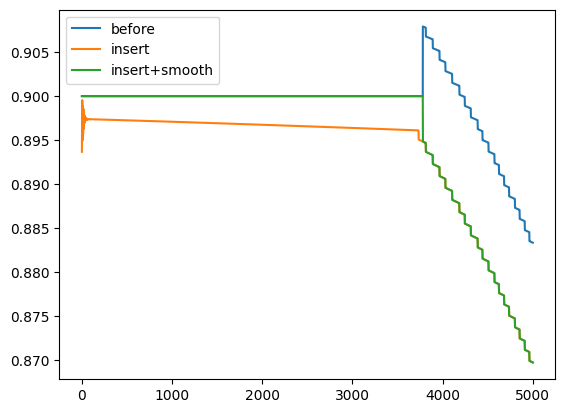

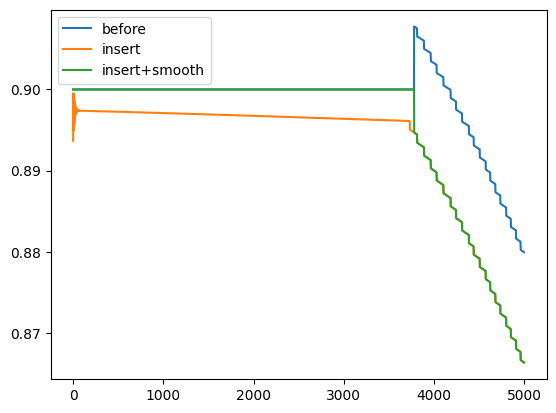

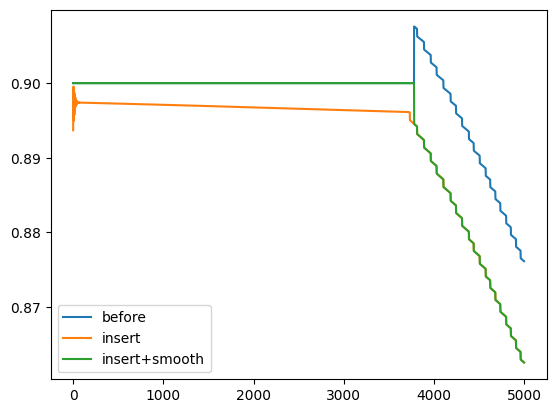

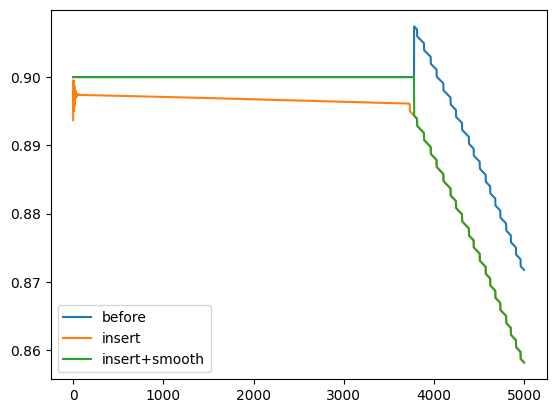

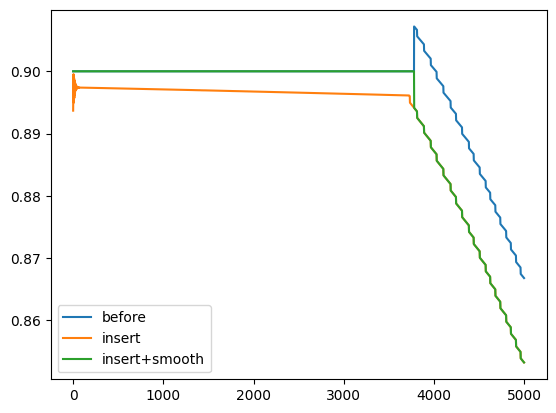

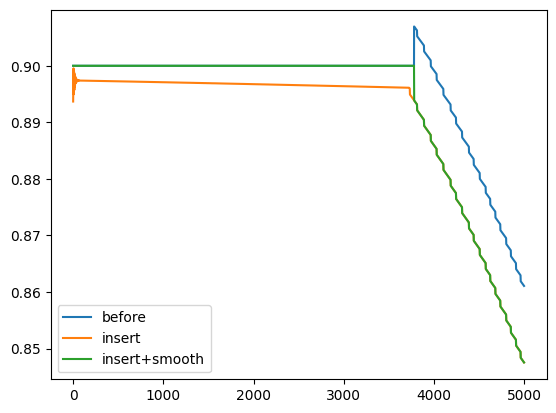

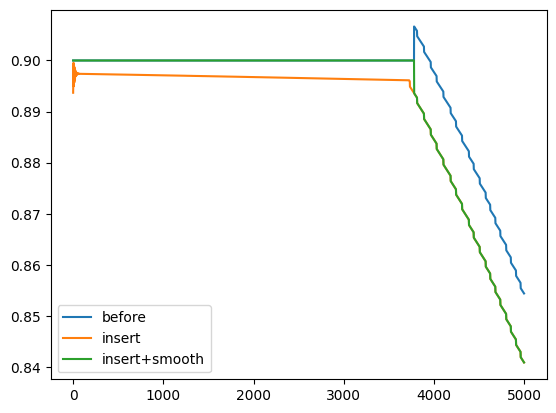

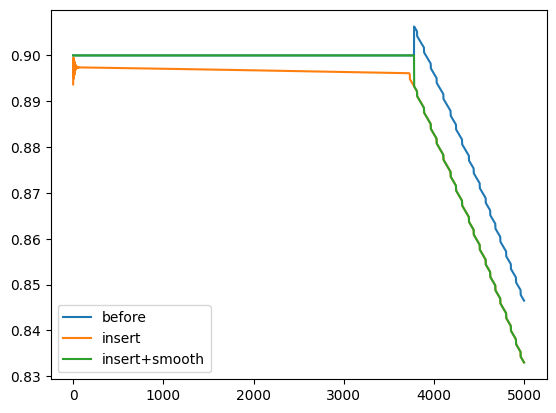

In [17]:
def get_constant_range(current, threshold=1e-2):
    # find SoC contant range using Current.
    y = current
    mask = np.abs(y - 0.5) < threshold
    segments = []
    in_segment = False
    start = None

    for i, val in enumerate(mask):
        if val and not in_segment:
            # 구간 시작
            in_segment = True
            start = i
        elif not val and in_segment:
            # 구간 끝
            in_segment = False
            end = i - 1
            segments.append((start, end))

    # 끝까지 평평하면 마지막 처리
    if in_segment:
        segments.append((start, len(y)-1))

    # assert len(segments)==3
    # return segments[1]

    # print(segments)
    return segments

exist_data = "./data/SoC_synthesis3/20220504/20220504_concat.npy"
exist_data = np.load(exist_data)
new_data = exist_data.copy()

start, end = 55000, 82000

Exps = [p.split('/')[-1] for p in ALL]
for u in range(len(Exps)):
    exp = Exps[u]
    new_data_path = f'./data/generated/{exp}.npy'
    print(new_data_path)
    pre_tomorrow_nps = pre_tomorrow_nps_bundle[u]
    for i in range(10):
        # i = intensity
        if i == 0:
            insert_idx = slice(i*SEC + start, i*SEC + end)
            day_idx = slice(i*SEC, (i+1)*SEC)
        else:
            insert_idx = slice((i+1)*SEC + start, (i+1)*SEC + end)
            day_idx = slice((i+1)*SEC, (i+2)*SEC)

        # 100 is just choice. 상수 구간의 초반 값을 가져오기.
        # used at smoothing 
        constant = np.mean(new_data[insert_idx,2][:100])

        plt.plot(new_data[insert_idx,2][:5000], label='before')

        # insert model's output
        new_data[insert_idx, 2] = pre_tomorrow_nps[i]

        plt.plot(new_data[insert_idx,2][:5000], label='insert')

        # smoothing
        (_,x), (_,_) = get_constant_range(new_data[insert_idx,1], threshold=4e-2)
        new_data[insert_idx,2][:x] = constant
        plt.plot(new_data[insert_idx,2][:5000], label='insert+smooth')
        # plt.axvline(x=x, color="red", linestyle="--", linewidth=1.5)
        plt.legend()
        plt.show()


    # np.save(new_data_path, new_data)

# 원본과 최종데이터 사이의 정확도 수치.

In [29]:
# 원본데이터
ORIGINAL = np.load('./data/SoC_synthesis3/20220504/20220504_concat.npy')

# 최종데이터
FINAL_DATA = glob.glob('./data/generated/*.npy')
FINAL_DATA = [data for data in FINAL_DATA if 'lr' in data]

for data_path in FINAL_DATA:
    print(data_path)
    data = np.load(data_path)

    mae_losses = []
    for i in range(1, 10):
        ori = ORIGINAL[(i+1)*86400 + 55000: (i+1)*86400 + 82000, 2]
        d = data[i*86400 + 55000: i*86400 + 82000, 2]

        mae = np.mean(np.abs(ori - d))   # MAE 계산
        mae_losses.append(mae)

    # print("MAE per segment:", mae_losses)
    print("Average MAE:", np.mean(mae_losses))

./data/generated/lr1e-4_lambda1_0.1_55000_82000_0908_syn3.npy
Average MAE: 0.02218065931969816
./data/generated/lr1e-3_lambda1_0.2_55000_82000_0908_syn3_mae.npy
Average MAE: 0.016336423442598155
./data/generated/lr1e-4_lambda1_0.05_55000_82000_0908_syn3_mse.npy
Average MAE: 0.01481987525707576
./data/generated/lr1e-4_lambda1_0.1_whole_data.npy
Average MAE: 0.01466709004116249
./data/generated/lr1e-4_lambda1_0.1_55000_82000_0908.npy
Average MAE: 0.01710694926777335


# 위에꺼에서 하나만 픽스해서 그림 뽑기용.

(950400, 7)
./data/generated/lr1e-4_lambda1_0.05_55000_82000_0908_syn3_mse.npy
(950400, 7)
Generated Data in one plot


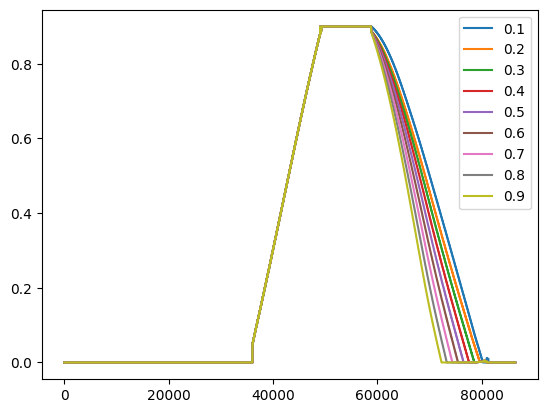

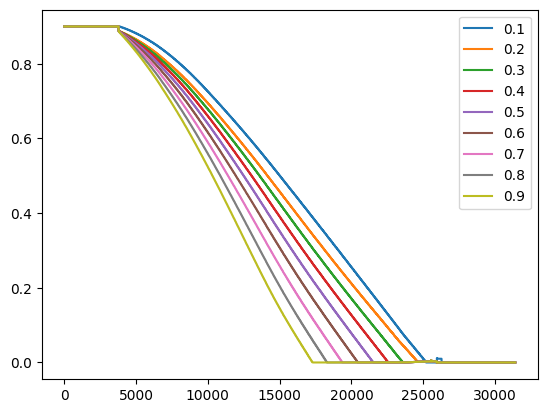

Each Original vs Generated Data
Original(intensity=0) vs Generated(intensity=0)


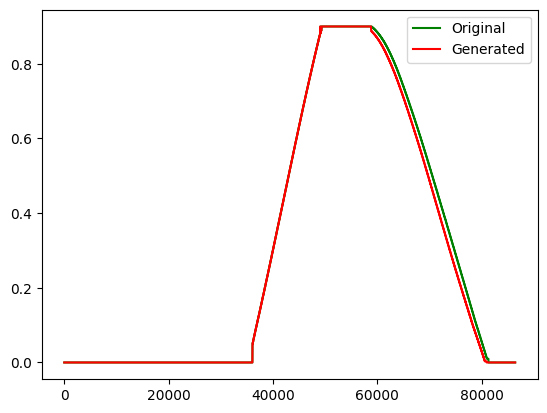

MSE Loss = 0.00014844221216625916


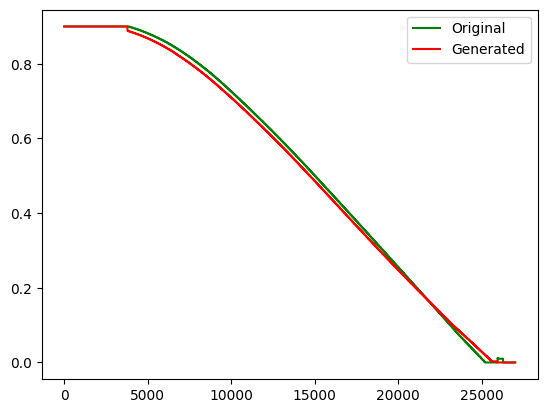

Original(intensity=0.2) vs Generated(intensity=0.2)


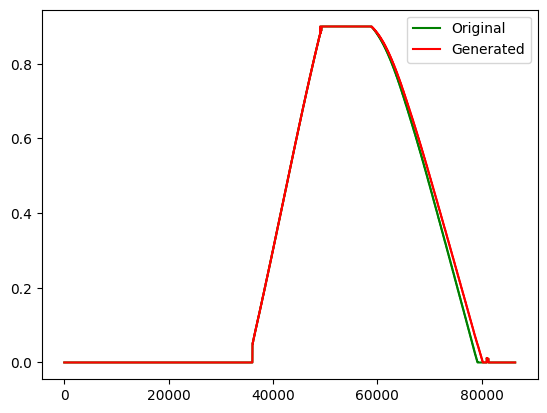

MSE Loss = 0.00016102157860015955


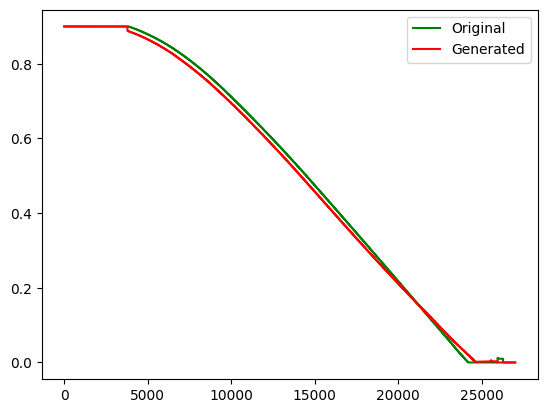

Original(intensity=0.3) vs Generated(intensity=0.3)


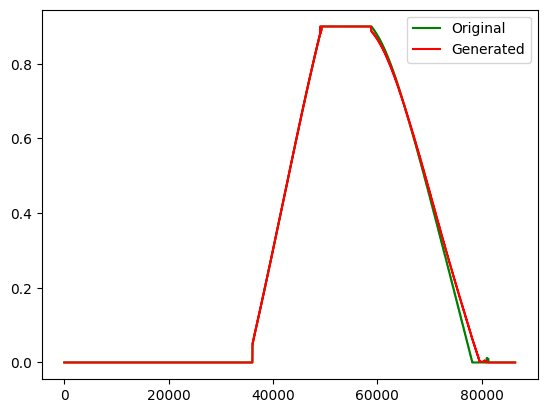

MSE Loss = 0.00017221123223525706


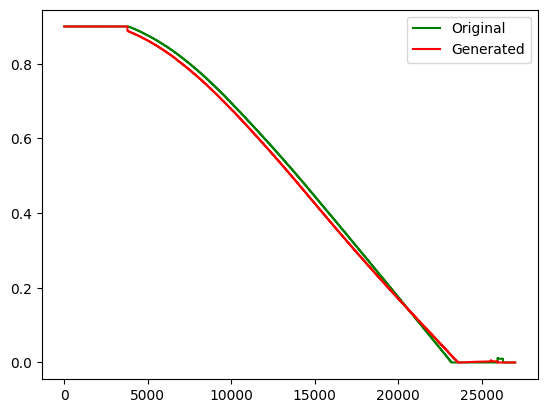

Original(intensity=0.4) vs Generated(intensity=0.4)


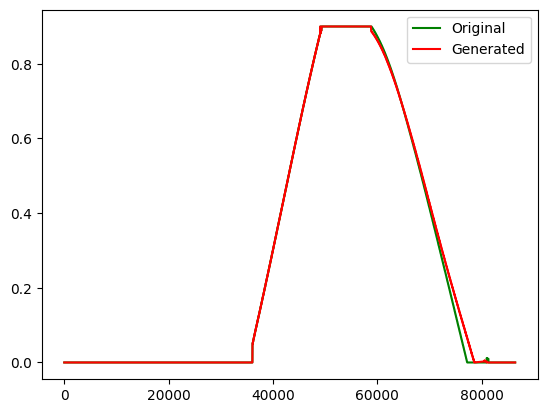

MSE Loss = 0.000183317001836752


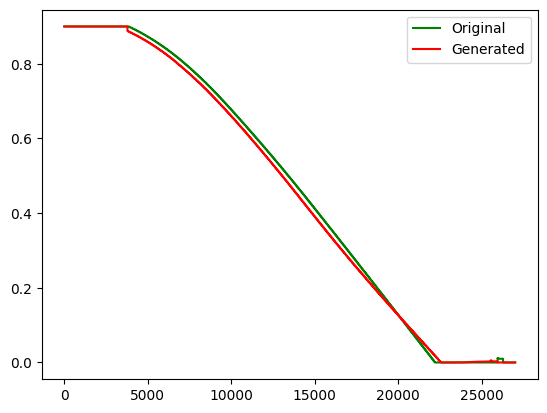

Original(intensity=0.5) vs Generated(intensity=0.5)


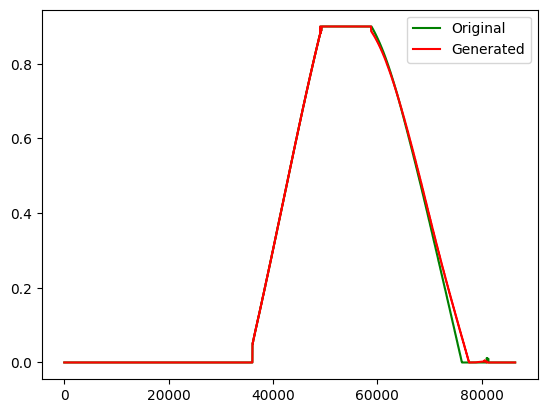

MSE Loss = 0.00018968446454853722


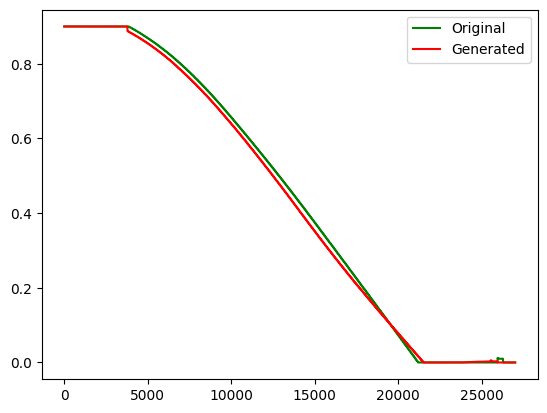

Original(intensity=0.6) vs Generated(intensity=0.6)


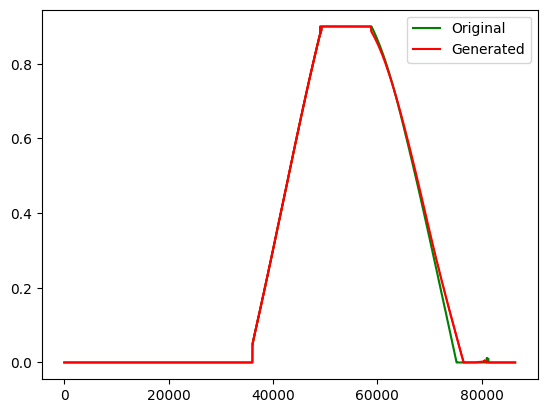

MSE Loss = 0.00018812820903678414


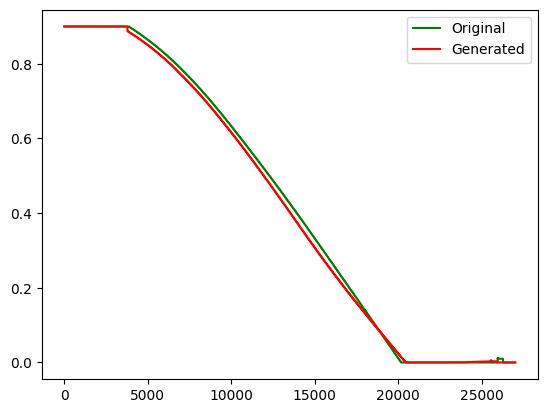

Original(intensity=0.7) vs Generated(intensity=0.7)


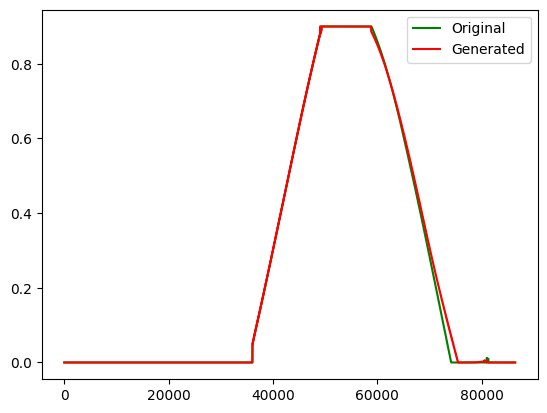

MSE Loss = 0.000174541392738623


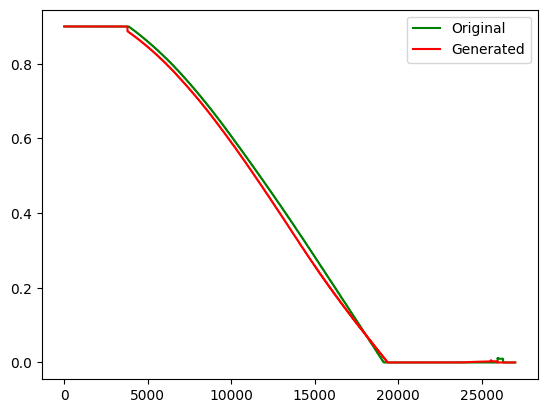

Original(intensity=0.8) vs Generated(intensity=0.8)


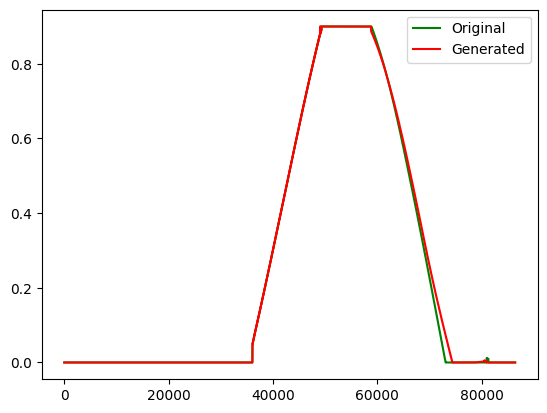

MSE Loss = 0.0001463242647508579


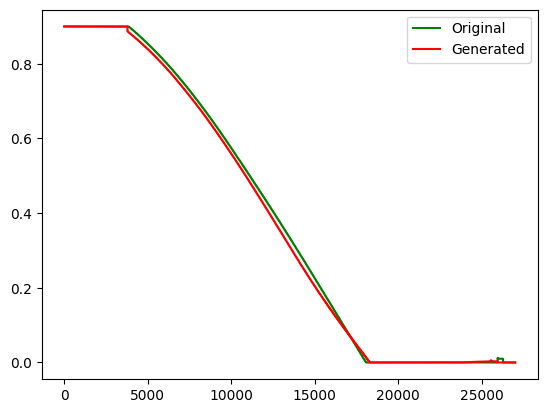

Original(intensity=0.9) vs Generated(intensity=0.9)


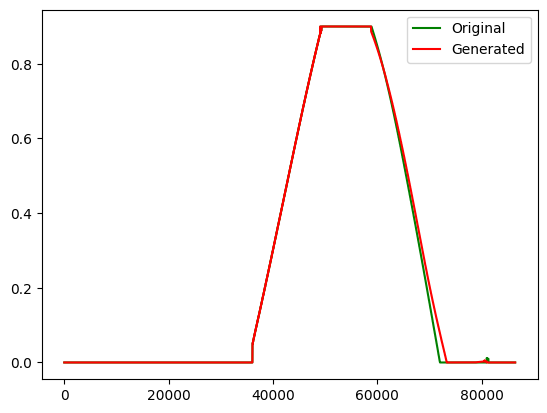

MSE Loss = 0.00010844395630166687


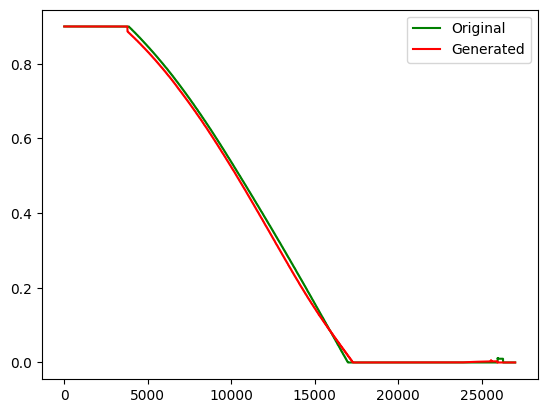

Original(intensity=1.0) vs Generated(intensity=1.0)


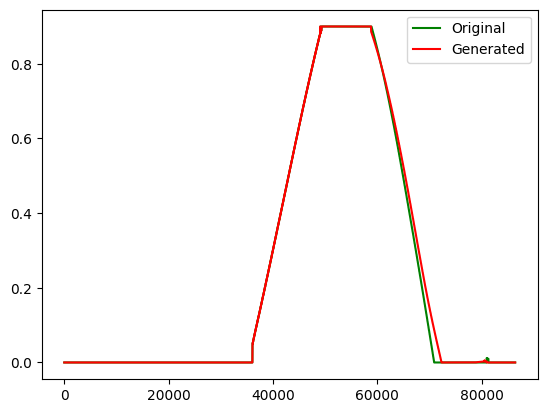

MSE Loss = 7.694603973088349e-05


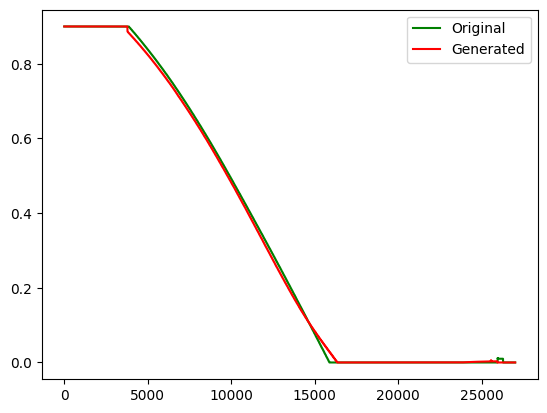

Average MSE Loss =  0.00015562423775328016


In [26]:
# 원본데이터
ORIGINAL = np.load('./data/SoC_synthesis3/20220504/20220504_concat.npy')

# 최종데이터
FINAL_DATA = ['./data/generated/lr1e-4_lambda1_0.05_55000_82000_0908_syn3_mse.npy']

soc_column_index = 2

print(ORIGINAL.shape)

for data_path in FINAL_DATA:
    print(data_path)
    data = np.load(data_path)
    print(data.shape)

    print("Generated Data in one plot")
    # Full plot
    for i in range(1, 10):
        plt.plot(data[i*86400: (i+1)*86400, soc_column_index], label=i/10)
    plt.legend()
    plt.show()

    # section plot
    for i in range(1, 10):
        plt.plot(data[i*86400 + 55000: (i+1)*86400, soc_column_index], label=i/10)
    plt.legend()
    plt.show()


    mae_losses = []
    print("Each Original vs Generated Data")
    for i in range(0, 10):

        if i == 0:
            print(f"Original(intensity=0) vs Generated(intensity=0)")
            # Full plot
            plt.plot(ORIGINAL[i*86400: (i+1)*86400, soc_column_index], label='Original', color='green')
            plt.plot(data[i*86400: (i+1)*86400, soc_column_index], label='Generated', color='red')
            plt.legend()
            plt.show()

            # section plot
            ori = ORIGINAL[(i+1)*86400 + 55000: (i+1)*86400 + 82000, soc_column_index]
            d = data[i*86400 + 55000: i*86400 + 82000, soc_column_index]

            print(f"MSE Loss = {np.square(ori-d).mean()}")
            plt.plot(ori, label='Original', color='green')
            plt.plot(d, label='Generated', color='red')
            plt.legend()
            plt.show()

        else:
            print(f"Original(intensity={(i+1)/10}) vs Generated(intensity={(i+1)/10})")
            # Full plot
            plt.plot(ORIGINAL[(i+1)*86400: (i+2)*86400, soc_column_index], label='Original', color='green')
            plt.plot(data[i*86400: (i+1)*86400, soc_column_index], label='Generated', color='red')
            plt.legend()
            plt.show()

            # section plot
            ori = ORIGINAL[(i+1)*86400 + 55000: (i+1)*86400 + 82000, soc_column_index]
            d = data[(i+1)*86400 + 55000: (i+1)*86400 + 82000, soc_column_index]

            mse_loss = np.square(ori-d).mean()
            print(f"MSE Loss = {mse_loss}")
            mae_losses.append(mse_loss)
            plt.plot(ori, label='Original', color='green')
            plt.plot(d, label='Generated', color='red')
            plt.legend()
            plt.show()
    print("Average MSE Loss = ", sum(mae_losses)/len(mae_losses))
